<a href="https://colab.research.google.com/github/azuckerm/Dissertation/blob/main/EDA_Pre_and_Post_Attitudes_Survey_Clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis
## Goals of this notebook
* Examine the properties of the attitudes survey for WI24 & SP24
* Export a CSV with all of this data, clearly organized.

#Set-Up

In [ ]:
# Import necessary packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
#from google.colab import files

!pip install statannot
from statannot import add_stat_annotation
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from google.colab import files
from statsmodels.stats.multitest import multipletests


!pip install pingouin
import pingouin as pg


# Specify that all plots will happen inline & in high resolution
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#plt.rcParams['figure.dpi'] = 300

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.5 MB/s eta 0:00:00


#Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load in csv file
pre_survey= pd.read_csv('/content/drive/My Drive/Dissertation Work/Survey Analysis/Attitudinal Survey/Pre Coding Attitudes Survey Spring 2024_Cleaned_PIDs Manually Corrected.csv')
post_survey= pd.read_csv('/content/drive/My Drive/Dissertation Work/Survey Analysis/Attitudinal Survey/Post Coding Attitudes Survey Spring 2024_Cleaned_PIDs Manually Corrected.csv')

#Import Item Questions

print("Final number of completed pre responses is: " + str(len(pre_survey)) +' responses.')
print("Final number of completed post responses is: " + str(len(post_survey)) +' responses.')

In [ ]:
#Remove students who answered trap question incorrectly
pre_survey= pre_survey[pre_survey['Q31_6'] == 'Agree']
post_survey= post_survey[post_survey['Q31_6'] == 'Agree']


Final number of completed pre responses is: 1156 responses.
Final number of completed post responses is: 757 responses.


In [ ]:
#Load in item statements

questions= pd.read_csv('/content/drive/My Drive/Dissertation Work/Survey Analysis/Attitudinal Survey/Attitudes Survey_Item Key.csv')

#Import the Inclusion of Other in Self Scale

In [ ]:
#Import version of the data frame that includes that data

inclusion_scale_survey_pre= pd.read_csv('/content/drive/My Drive/Dissertation Work/Survey Analysis/Attitudinal Survey/Pre Coding Attitudes Survey Spring 2024_Numeric_Inclusion of Other_Cleaned_PIDs Manually Corrected.csv')
inclusion_scale_survey_post= pd.read_csv('/content/drive/My Drive/Dissertation Work/Survey Analysis/Attitudinal Survey/Post Coding Attitudes Survey Spring 2024_Numeric_Inclusion of Other_Cleaned_PIDs Manually Corrected.csv')

#Rename the scales to be more meaningful

#IOS_CP = Inclusion of Others in Self for Computer Programming
#IOS_B = Inclusion of Others in Self for Biology
#IOS_CB= Inclusion of Others in Self for Computational Biology

#Within each set 1= Me, 2= My family, 3= My race, 4= My gender
inclusion_scale_survey_pre=inclusion_scale_survey_pre.rename(columns={"Q35": "IOS_CP1","Q42": "IOS_CP2","Q40": "IOS_CP3","Q41": "IOS_CP4",
                                                              "Q23": "IOS_B1","Q45": "IOS_B2","Q43": "IOS_B3","Q44": "IOS_B4",
                                                              "Q28": "IOS_CB1","Q48": "IOS_CB2","Q46": "IOS_CB3","Q47": "IOS_CB4"})

inclusion_scale_survey_post=inclusion_scale_survey_post.rename(columns={"Q35": "IOS_CP1","Q42": "IOS_CP2","Q40": "IOS_CP3","Q41": "IOS_CP4",
                                                              "Q23": "IOS_B1","Q45": "IOS_B2","Q43": "IOS_B3","Q44": "IOS_B4",
                                                              "Q28": "IOS_CB1","Q48": "IOS_CB2","Q46": "IOS_CB3","Q47": "IOS_CB4"})


IOS_pre = inclusion_scale_survey_pre[['StudentID','IOS_CP1','IOS_CP2','IOS_CP3','IOS_CP4','IOS_B1','IOS_B2','IOS_B3','IOS_B4','IOS_CB1','IOS_CB2','IOS_CB3','IOS_CB4']]
IOS_post = inclusion_scale_survey_pre[['StudentID','IOS_CP1','IOS_CP2','IOS_CP3','IOS_CP4','IOS_B1','IOS_B2','IOS_B3','IOS_B4','IOS_CB1','IOS_CB2','IOS_CB3','IOS_CB4']]

#Integrate IOS scales into main data frame, matching on Student ID

pre_survey=pd.merge(pre_survey, IOS_pre, on='StudentID', how='left')
post_survey=pd.merge(post_survey, IOS_post, on='StudentID', how='left')

#Ensure that the IOS columns are numeric

cols_to_convert= ['IOS_CP1','IOS_CP2','IOS_CP3','IOS_CP4','IOS_B1','IOS_B2','IOS_B3','IOS_B4','IOS_CB1','IOS_CB2','IOS_CB3','IOS_CB4']

pre_survey[cols_to_convert] = pre_survey[cols_to_convert].apply(pd.to_numeric)
post_survey[cols_to_convert] = post_survey[cols_to_convert].apply(pd.to_numeric)



In [ ]:
#Merge the pre and post data sets together

merged_survey = pd.concat([pre_survey, post_survey])


In [ ]:
#Rename Columns to be more meaningful and aligned with the hypothesized construct
#GM=Growth Mindset
#FM=Fixed Mindset
#SE=Self-Efficacy
#VP=Verbal Persuasion
#I=Interest
#SB_C=Sense of Belonging in Computing
#SB_CB= Sense of Belonging in Computational Biology
#IP=Intentions to Persist

merged_survey=merged_survey.rename(columns={"Q30_1": "FM1","Q30_2": "GM1","Q30_3": "FM2","Q30_4": "GM2","Q30_5": "FM3","Q30_6": "GM3",
                                      "Q30_7": "FM4","Q30_8": "GM4","Q30_9": "GM5","Q51_1": "SE1","Q51_2": "SE2","Q51_3": "SE3",
                                      "Q51_4": "SE4","Q51_5": "SE5","Q51_6": "SE6","Q51_7": "SE7","Q51_8": "SE8","Q31_1": "VP1",
                                      "Q31_2": "VP2","Q31_3": "VP3","Q31_4": "VP4","Q31_5": "VP5","Q31_7": "VP6","Q31_8": "I1",
                                      "Q31_9": "I2","Q31_10": "I3","Q31_11": "I4","Q32_1": "SB_C1","Q32_2": "SB_C2","Q32_3": "SB_C3",
                                      "Q32_4": "SB_C4","Q33_1": "SB_CB1","Q33_2": "SB_CB2","Q33_3": "SB_CB3","Q33_4": "SB_CB4",
                                      "Q29_1":"IP1","Q29_2":"IP2","Q29_3":"IP3","Q29_4":"IP4","Q29_5":"IP5","Q29_6":"IP6"})

In [ ]:
#Change Likert ratings from text to numerical scale
merged_survey=merged_survey.replace(['Strongly disagree','Disagree', 'Somewhat disagree', 'Somewhat agree', 'Agree','Strongly agree'],
                     [1, 2, 3, 4, 5,6])

merged_survey=merged_survey.replace(['Very unlikely','Unlikely', 'Somewhat unlikely', 'Somewhat likely', 'Likely','Very likely'],
                     [1, 2, 3, 4, 5,6])

#Fix the PIDs

In [ ]:
#Students did some weird stuff with their PIDs, fix it to the fullest extent possible

# Convert all values in the 'PID' column to strings
merged_survey['StudentID']= merged_survey['StudentID'].astype(str)

#Get rid of unnecessary spaces
merged_survey['StudentID'] = merged_survey['StudentID'].str.strip()

# Replace leading 'a' with 'A'
merged_survey['StudentID'] = merged_survey['StudentID'].str.replace(r'^a', 'A', regex=True)

#If they didn't start the PIDs with an A or U, add an A (most likely)
merged_survey['StudentID'] = merged_survey['StudentID'].apply(lambda x: 'A' + x if not (x.startswith('A') or x.startswith('U')) else x)


#Quick glance at major distribution and prior coding experience




In [ ]:
#Only look at majors in BILD 62
BILD = pre_survey.loc[pre_survey['Course'] == 'BILD 62']
BILD['Major'].value_counts()

,count
Major,
Human Biology,20
Neurobiology,15
General Biology,11
Other (please specify):,7
Molecular and Cell Biology,7
Cognitive and Behavioral Neuroscience,3
Microbiology,3
Marine Biology,2
"Ecology, Behavior, and Evolution",2


In [ ]:
pre_survey.groupby('Course')['Prior_Coding'].value_counts()

Course               Prior_Coding                                                                       
BILD 62              No coding experience                                                                    55
                     Some coding experience (e.g., you've never taken a course, but you have dabbled)        24
                     A decent amount of coding experience (e.g., you've taken at least one course)            8
COGS 18 Spring 2024  No coding experience                                                                   330
                     Some coding experience (e.g., you've never taken a course, but you have dabbled)        99
                     A decent amount of coding experience (e.g., you've taken at least one course)           97
                     A significant amount of coding experience (e.g., you regularly write your own code)      6
COGS 18 Winter 2024  No coding experience                                                                   143
                     A decent amount of coding experience (e.g., you've taken at least one course)           52
                     Some coding experience (e.g., you've never taken a course, but you have dabbled)        49
CSE 6R               No coding experience                                                                    25
                     Some coding experience (e.g., you've never taken a course, but you have dabbled)         9
                     A decent amount of coding experience (e.g., you've taken at least one course)            5
CSE 8A               No coding experience                                                                   129
                     Some coding experience (e.g., you've never taken a course, but you have dabbled)        70
                     A decent amount of coding experience (e.g., you've taken at least one course)           53
                     A significant amount of coding experience (e.g., you regularly write your own code)      2
Name: count, dtype: int64

#Look at reliability statistics (Cronbach's alpha) for each subscale

In [ ]:
SE=merged_survey[['SE1','SE2','SE3','SE4','SE5','SE6','SE7','SE8']]

SE_alpha = pg.cronbach_alpha(data=SE)

print("Self-Efficacy Cronbach's alpha is :",SE_alpha)

VP=merged_survey[['VP1','VP2','VP3','VP4','VP5','VP6']]

VP_alpha = pg.cronbach_alpha(data=VP)

print("Verbal Persuasion Cronbach's alpha is :",VP_alpha)

I=merged_survey[['I1','I2','I3','I4']]

I_alpha = pg.cronbach_alpha(data=I)

print("Interest Cronbach's alpha is :",I_alpha)

SB_C=merged_survey[['SB_C1','SB_C2','SB_C3','SB_C4']]

SB_C_alpha = pg.cronbach_alpha(data=SB_C)

print("Sense of Belonging in Computer Programming Cronbach's alpha is :",SB_C_alpha)

SB_CB=merged_survey[['SB_CB1','SB_CB2','SB_CB3','SB_CB4']]

SB_CB_alpha = pg.cronbach_alpha(data=SB_CB)

print("Sense of Belonging in Computational Biology Cronbach's alpha is :",SB_CB_alpha)

GM=merged_survey[['GM1','GM2','GM3','GM4','GM5']]

GM_alpha = pg.cronbach_alpha(data=GM)

print("Growth Mindset Cronbach's alpha is :",GM_alpha)

FM=merged_survey[['FM1','FM2','FM3','FM4']]

FM_alpha = pg.cronbach_alpha(data=FM)

print("Fixed Mindset Cronbach's alpha is :",FM_alpha)

IP=merged_survey[['IP1','IP3','IP4','IP5','IP6']]

IP_alpha = pg.cronbach_alpha(data=IP)

print("Intentions to Persist Cronbach's alpha is :",IP_alpha)




Self-Efficacy Cronbach's alpha is : (0.90885193366408, array([0.903, 0.915]))
Verbal Persuasion Cronbach's alpha is : (0.9466535865188596, array([0.943, 0.95 ]))
Interest Cronbach's alpha is : (0.9350645709155723, array([0.93, 0.94]))
Sense of Belonging in Computer Programming Cronbach's alpha is : (0.9567367634241122, array([0.953, 0.96 ]))
Sense of Belonging in Computational Biology Cronbach's alpha is : (0.9672490101773299, array([0.965, 0.97 ]))
Growth Mindset Cronbach's alpha is : (0.8328465485322964, array([0.821, 0.844]))
Fixed Mindset Cronbach's alpha is : (0.8760090401682938, array([0.867, 0.885]))
Intentions to Persist Cronbach's alpha is : (0.9275303624875855, array([0.922, 0.933]))


In [ ]:
#Create composite measures for each subscale
merged_survey['Self-Efficacy'] = merged_survey.loc[:, ['SE1','SE2','SE3','SE4','SE5','SE6','SE7','SE8']].mean(axis=1)
merged_survey['Verbal_Persuasion'] = merged_survey.loc[:, ['VP1','VP2','VP3','VP4','VP5','VP6']].mean(axis=1)
merged_survey['Interest'] = merged_survey.loc[:, ['I1','I2','I3','I4']].mean(axis=1)
merged_survey['SenseBelonging_Computing'] = merged_survey.loc[:, ['SB_C1','SB_C2','SB_C3','SB_C4']].mean(axis=1)
merged_survey['SenseBelonging_ComputationalBio'] = merged_survey.loc[:, ['SB_CB1','SB_CB2','SB_CB3','SB_CB4']].mean(axis=1)
merged_survey['Fixed_Mindset'] = merged_survey.loc[:, ['FM1','FM2','FM3','FM4']].mean(axis=1)
merged_survey['Growth_Mindset'] = merged_survey.loc[:, ['GM1','GM2','GM3','GM4','GM5']].mean(axis=1)
merged_survey['Intentions_Persist'] = merged_survey.loc[:, ['IP1','IP3','IP4','IP5','IP6']].mean(axis=1)

#Comparison of Subscales Pre and Post by Course

#Statistics

In [ ]:
variables = ['Self-Efficacy', 'Verbal_Persuasion','Interest', 'SenseBelonging_Computing','SenseBelonging_ComputationalBio','Growth_Mindset', 'Fixed_Mindset','Intentions_Persist']

# Separate pre and post DataFrames
pre = merged_survey[merged_survey['time'] == 'pre']
post = merged_survey[merged_survey['time'] == 'post']

# Iterate through each variable
for variable in variables:
    # Calculate mean for pre and post-self-efficacy scores
    pre_means = pre.groupby('Course')[variable].mean()
    post_means = post.groupby('Course')[variable].mean()

    # Perform t-test for each course
    results = {}
    for course in merged_survey['Course'].unique():
        pre_scores = pre[pre['Course'] == course][variable]
        post_scores = post[post['Course'] == course][variable]
        t_statistic, p_value = ttest_ind(pre_scores, post_scores)
        results[course] = {'Average Pre': pre_means.loc[course],
                           'Average Post': post_means.loc[course],
                           'p-value': p_value}

    # Create a DataFrame from the results dictionary
    results_df = pd.DataFrame.from_dict(results, orient='index')

    # Print table for the current variable
    print(f"Table for {variable}:")
    print(results_df)
    print("\n")


Table for Self-Efficacy:
                     Average Pre  Average Post   p-value
COGS 18 Winter 2024     4.067623      3.937107  0.127646
CSE 8A                  4.168799      4.180339  0.882793
BILD 62                 4.100575      4.150000  0.738669
CSE 6R                  3.887821      3.428571  0.052826
COGS 18 Spring 2024     3.933741      3.887109  0.463411


Table for Verbal_Persuasion:
                     Average Pre  Average Post       p-value
COGS 18 Winter 2024     2.238388      2.759958  1.533578e-06
CSE 8A                  2.270997      2.914062  2.174694e-09
BILD 62                 2.249042      2.894872  2.514274e-04
CSE 6R                  2.209402      2.722222  6.092977e-02
COGS 18 Spring 2024     2.029449      2.598438  3.381024e-14


Table for Interest:
                     Average Pre  Average Post   p-value
COGS 18 Winter 2024     4.091189      3.899371  0.116549
CSE 8A                  4.346457      4.338542  0.940340
BILD 62                 4.218391      4.292

#Plots

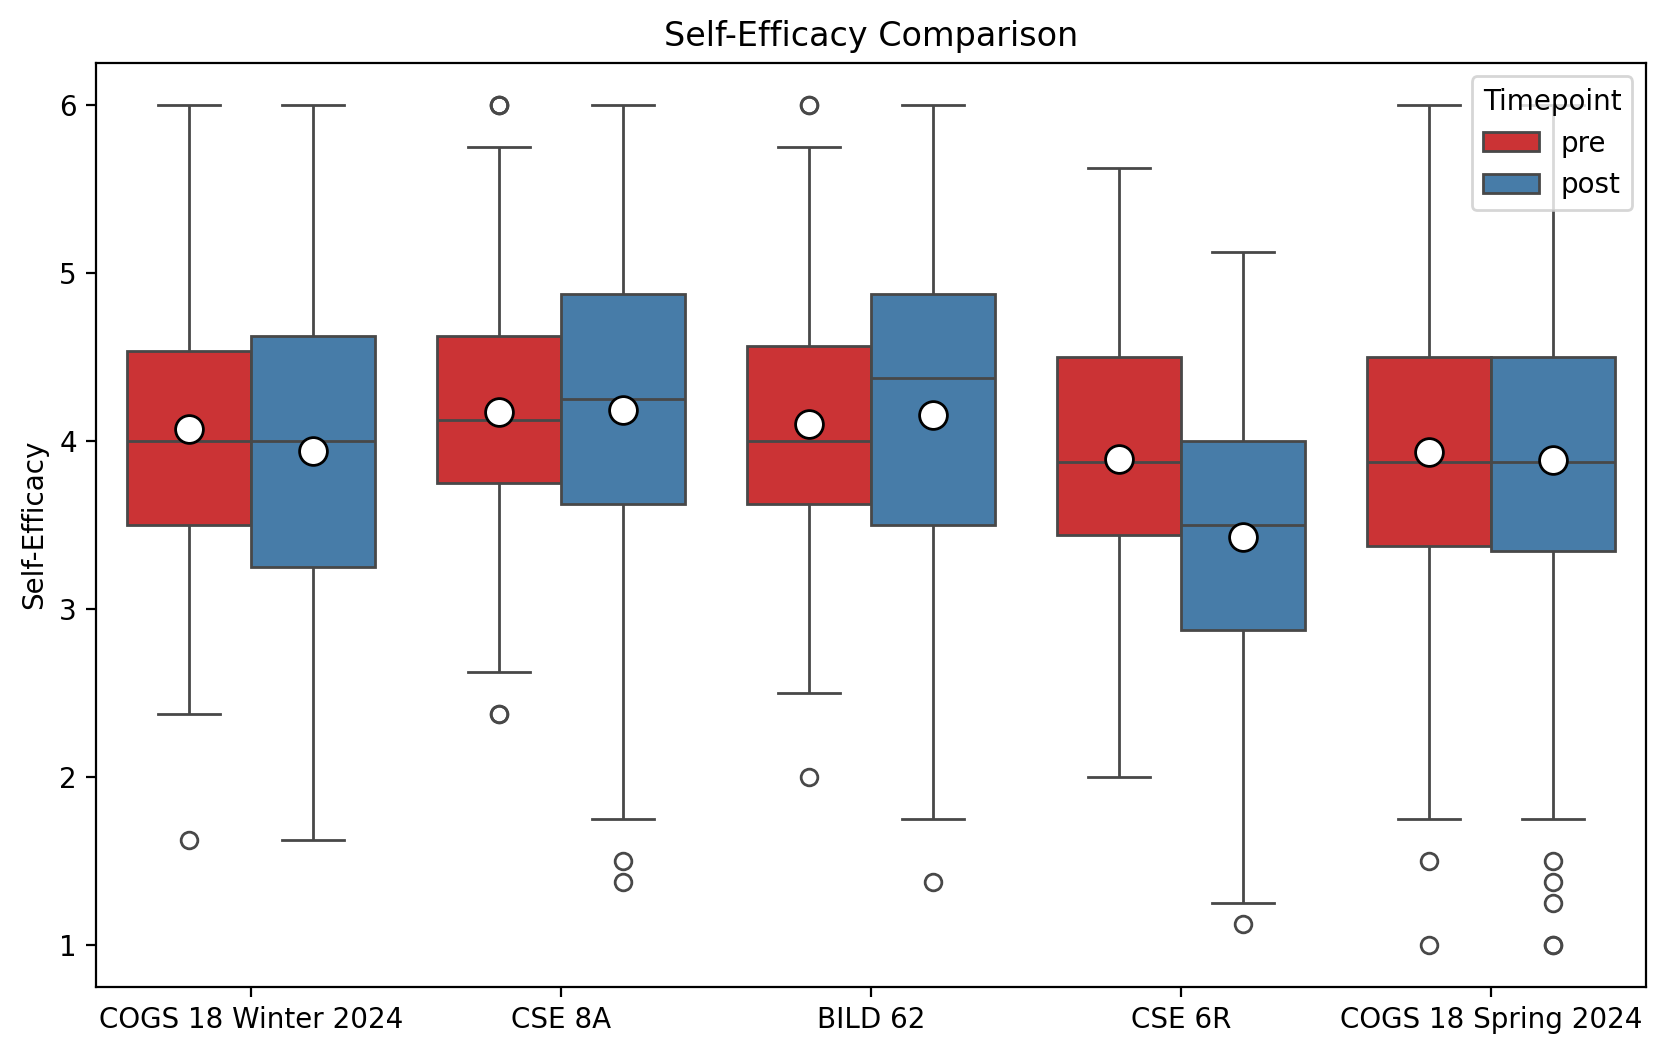

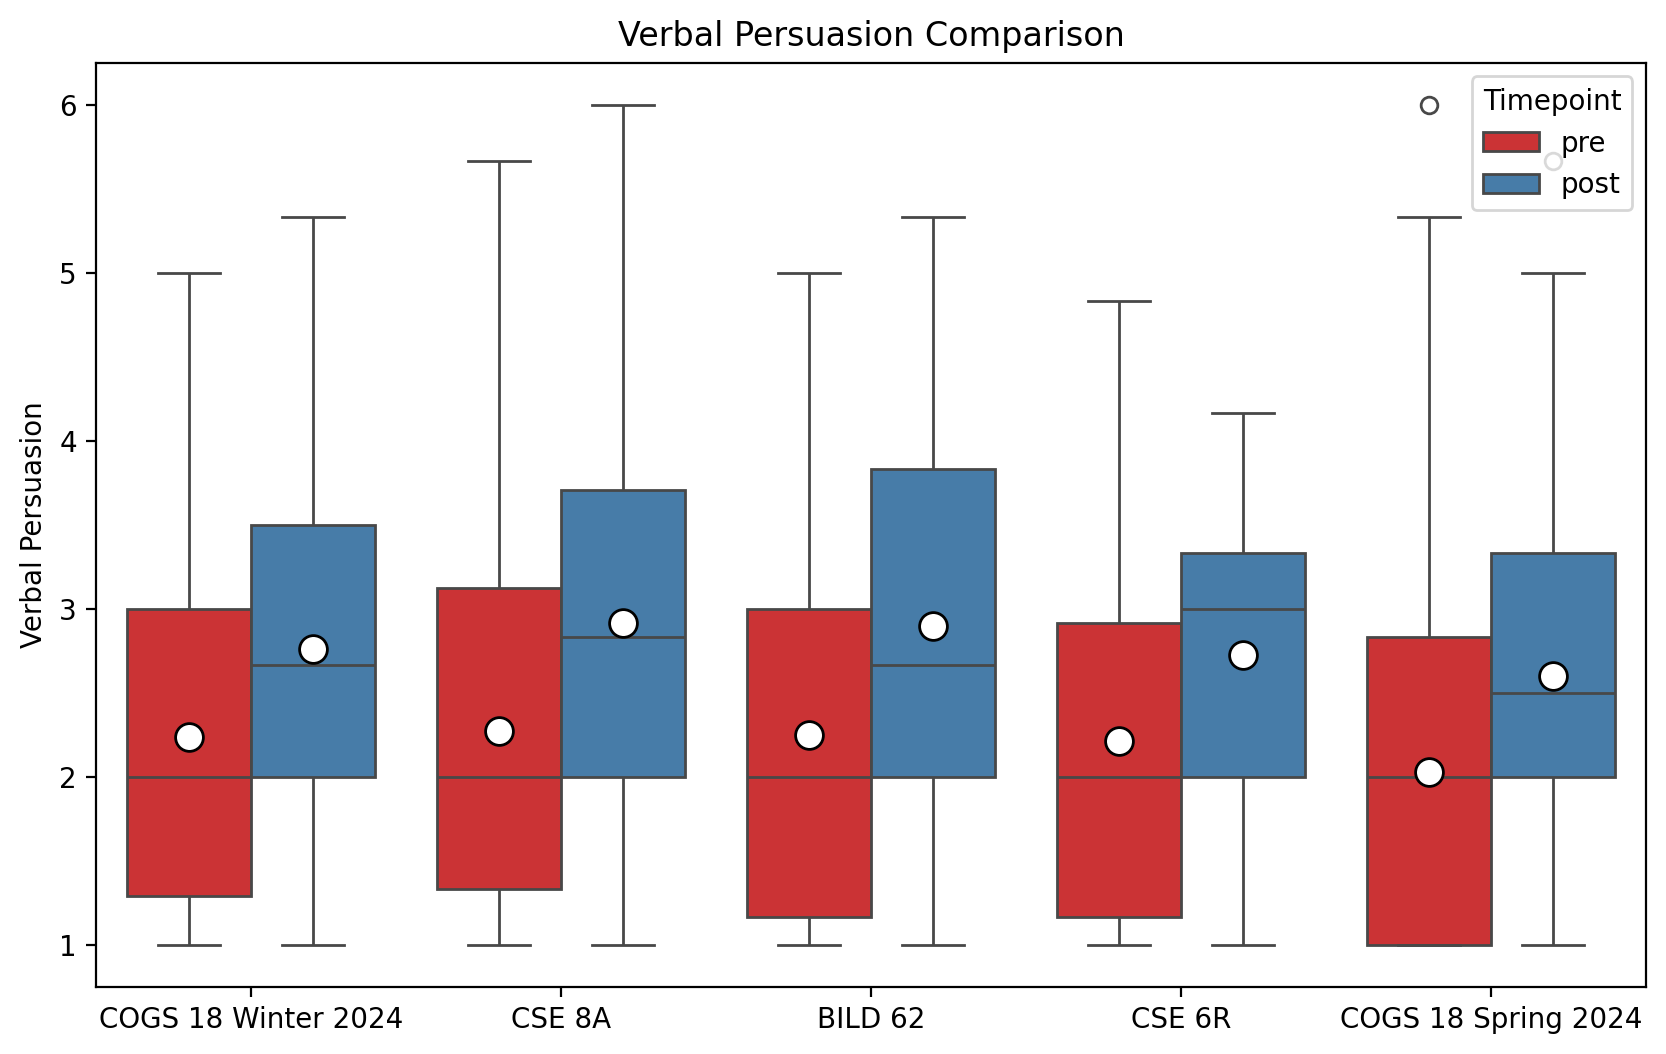

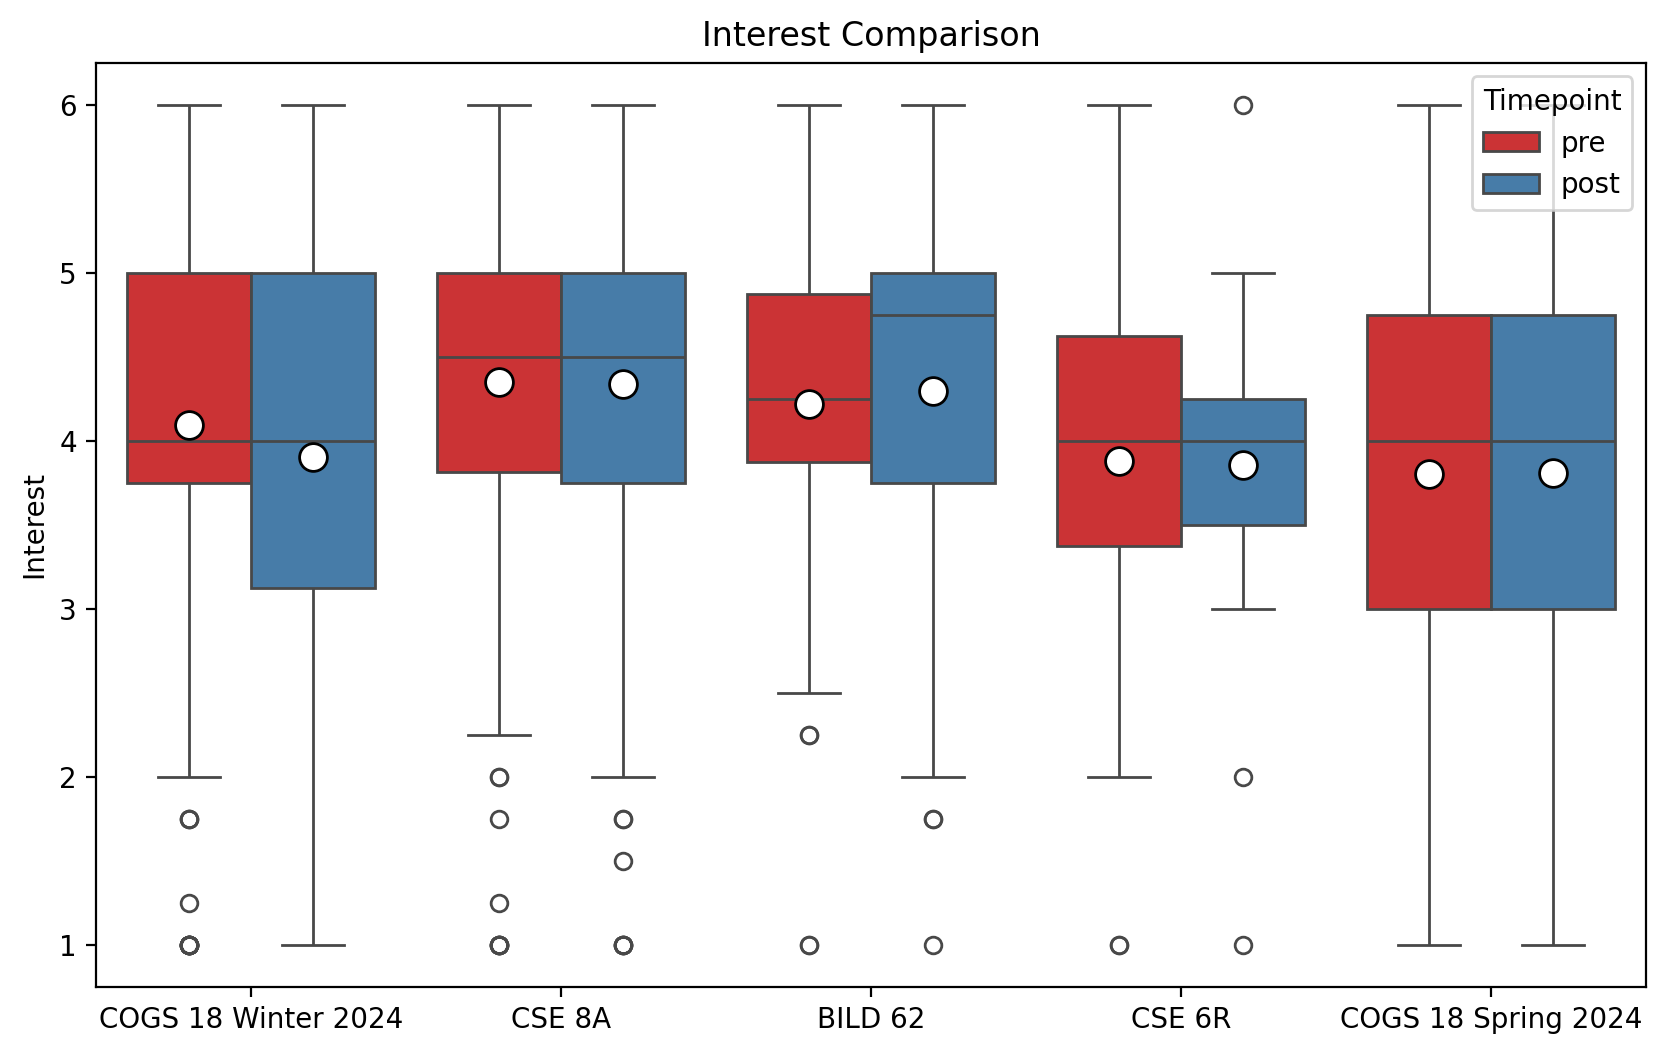

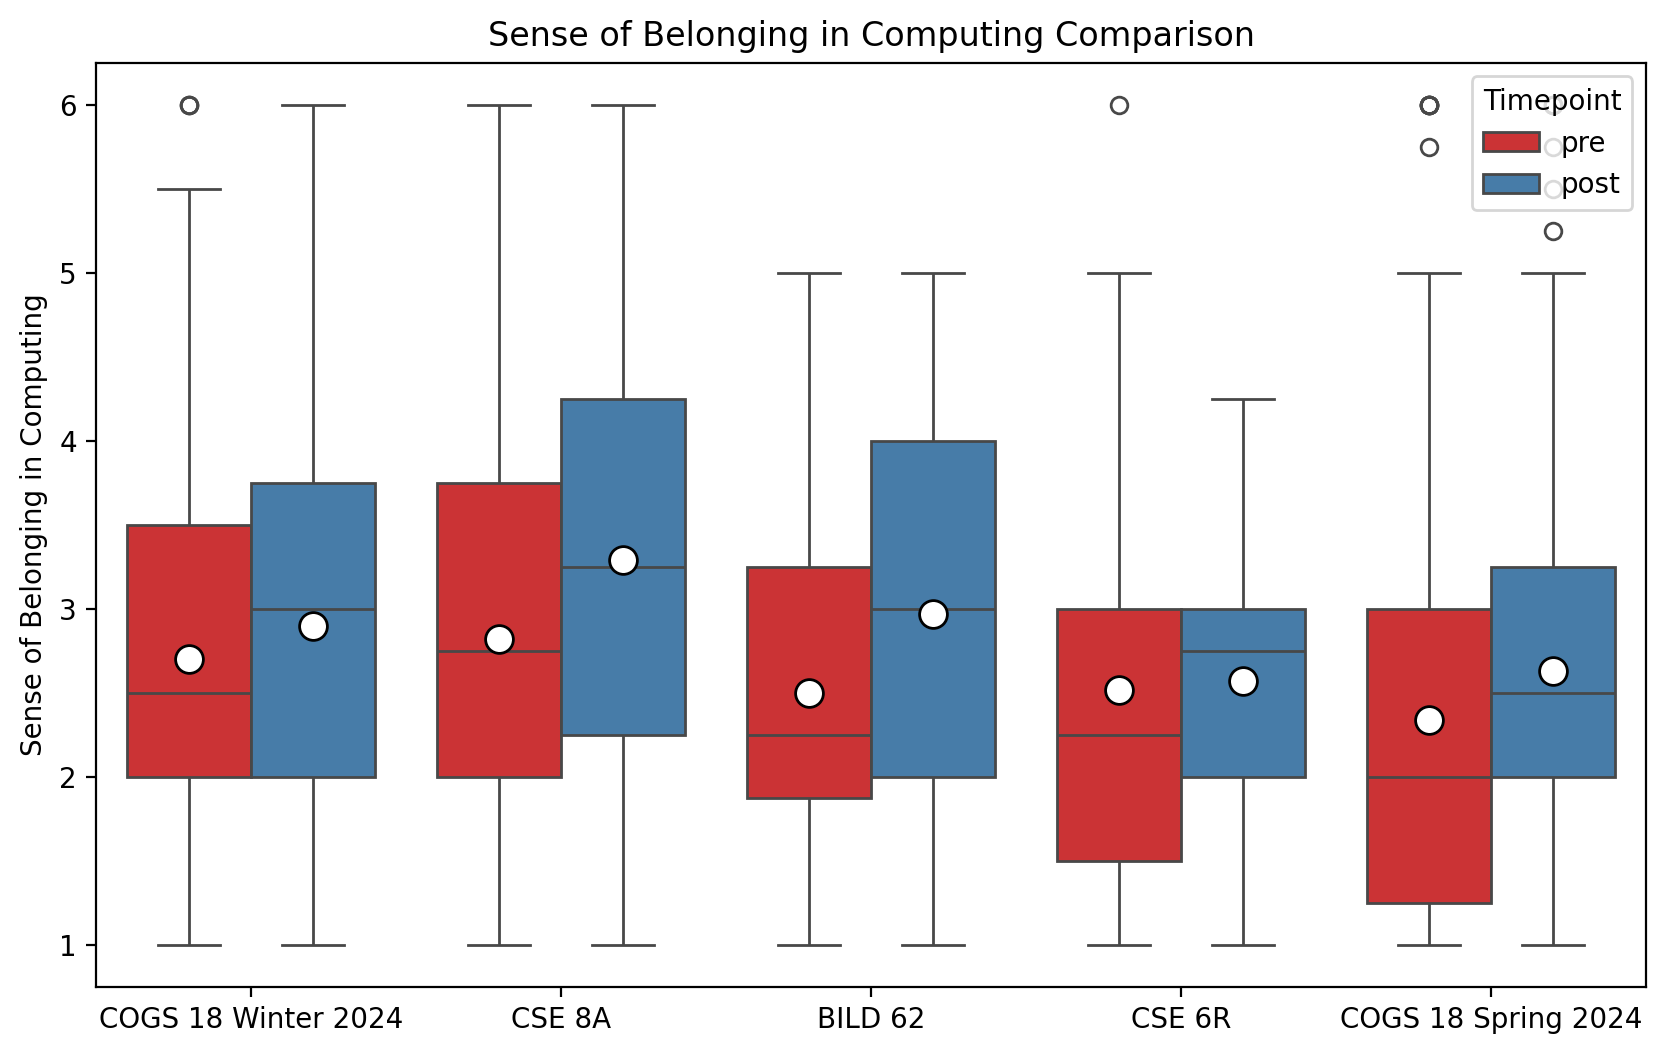

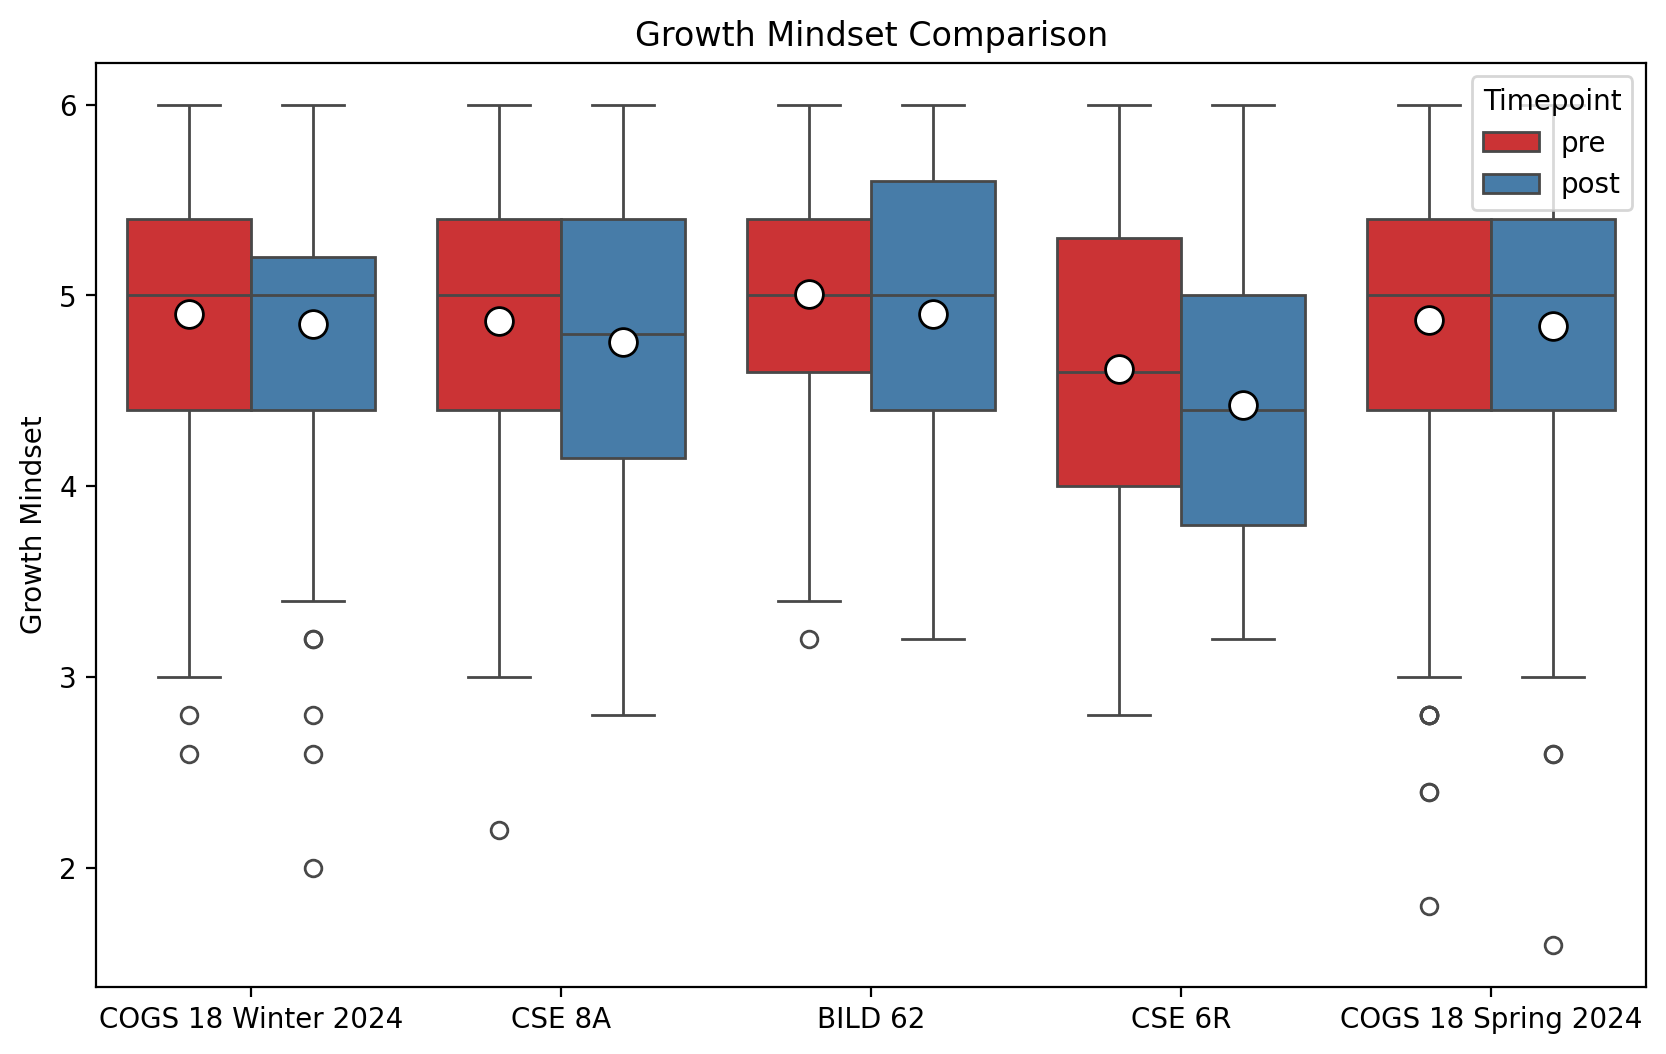

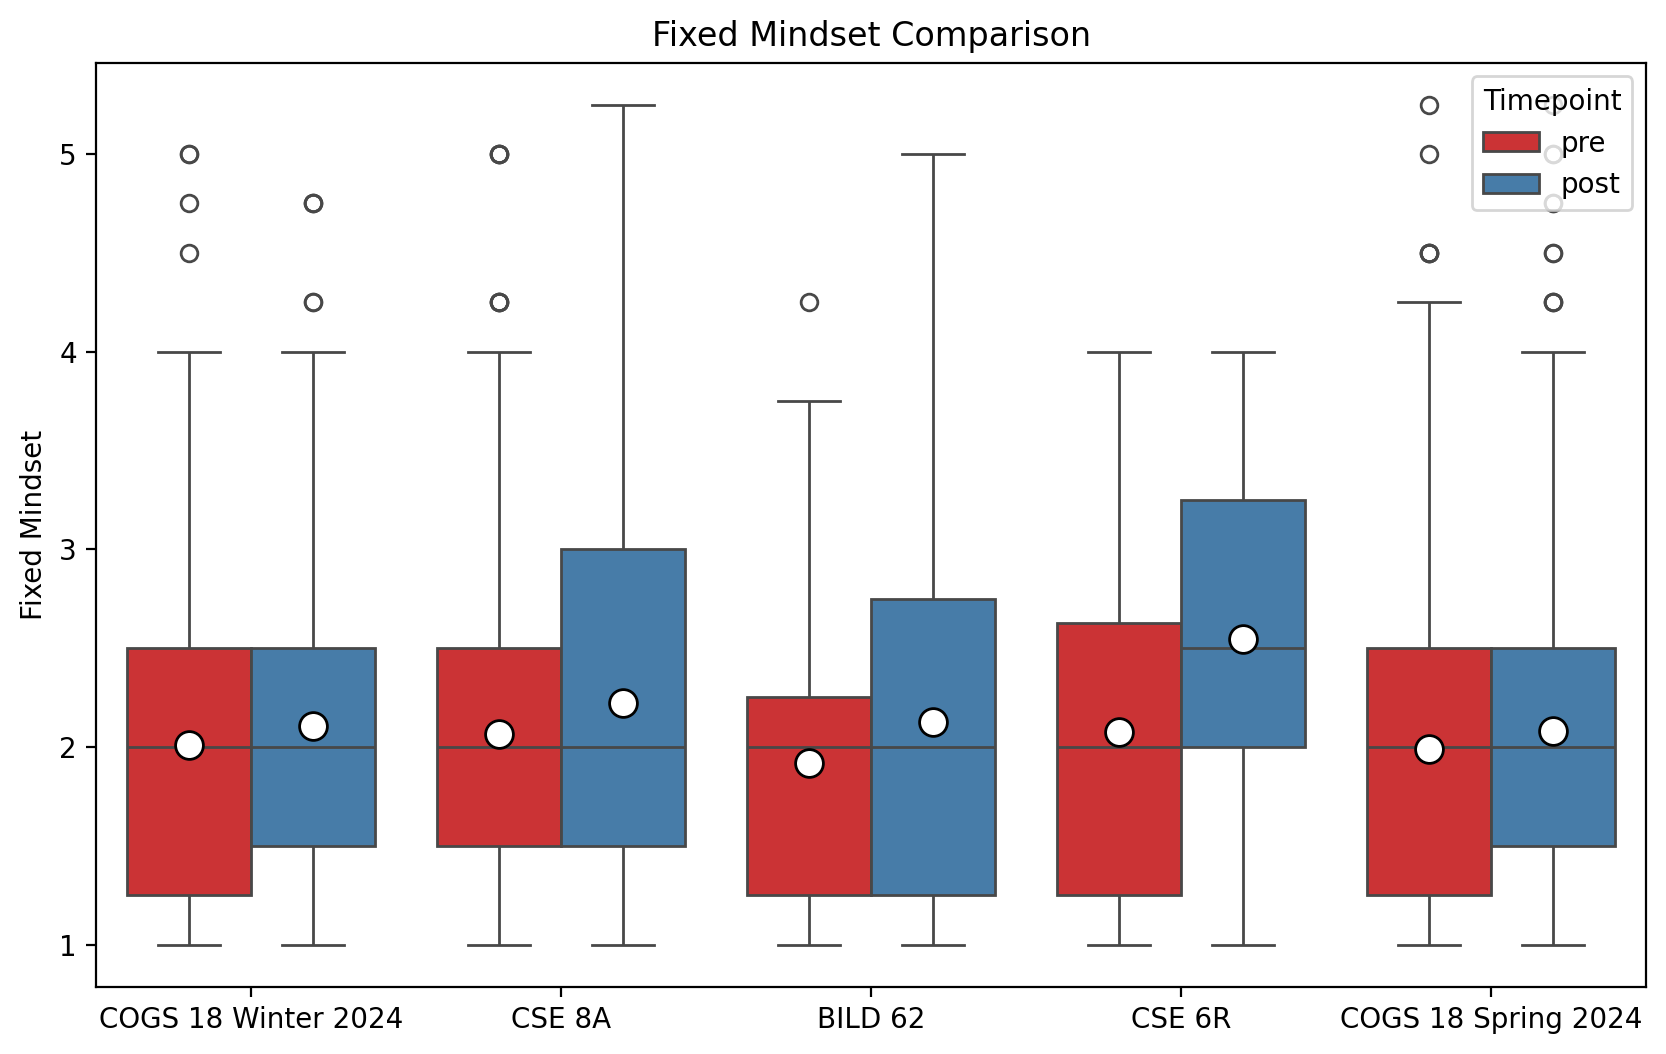

In [ ]:
# Self-Efficacy
plt.figure(figsize=(10, 6))
sns.boxplot(x='Course', y='Self-Efficacy', hue='time', data=merged_survey,palette="Set1",showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.title('Self-Efficacy Comparison')
plt.xlabel('')
plt.ylabel('Self-Efficacy')
plt.legend(title='Timepoint', loc='upper right')
plt.show()

#Verbal Persuasion
plt.figure(figsize=(10, 6))
sns.boxplot(x='Course', y='Verbal_Persuasion', hue='time', data=merged_survey,palette="Set1",showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.title('Verbal Persuasion Comparison')
plt.xlabel('')
plt.ylabel('Verbal Persuasion')
plt.legend(title='Timepoint', loc='upper right')
plt.show()


#Interest
plt.figure(figsize=(10, 6))
sns.boxplot(x='Course', y='Interest', hue='time', data=merged_survey,palette="Set1",showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.title('Interest Comparison')
plt.xlabel('')
plt.ylabel('Interest')
plt.legend(title='Timepoint', loc='upper right')
plt.show()

#Sense of Belonging in Computing
plt.figure(figsize=(10, 6))
sns.boxplot(x='Course', y='SenseBelonging_Computing', hue='time', data=merged_survey,palette="Set1",showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.title('Sense of Belonging in Computing Comparison')
plt.xlabel('')
plt.ylabel('Sense of Belonging in Computing')
plt.legend(title='Timepoint', loc='upper right')
plt.show()

#Growth Mindset
plt.figure(figsize=(10, 6))
sns.boxplot(x='Course', y='Growth_Mindset', hue='time', data=merged_survey,palette="Set1",showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.title('Growth Mindset Comparison')
plt.xlabel('')
plt.ylabel('Growth Mindset')
plt.legend(title='Timepoint', loc='upper right')
plt.show()

#Fixed Mindset
plt.figure(figsize=(10, 6))
sns.boxplot(x='Course', y='Fixed_Mindset', hue='time', data=merged_survey,palette="Set1",showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.title('Fixed Mindset Comparison')
plt.xlabel('')
plt.ylabel('Fixed Mindset')
plt.legend(title='Timepoint', loc='upper right')
plt.show()




#Item comparisons pre and post

In [ ]:
#Remove CSE 6R
all = merged_survey[merged_survey['Course'] != 'CSE 6R']

#Now only take the items
all= all[['SE1','SE2','SE3','SE4','SE5','SE6','SE7','SE8','IP1','IP2','IP3','IP4','IP5','IP6', 'VP1','VP2','VP3','VP4','VP5','VP6', 'I1',
                             'I2','I3','I4','SB_C1','SB_C2','SB_C3','SB_C4','SB_CB1','SB_CB2','SB_CB3','SB_CB4','GM1','GM2','GM3','GM4','GM5','FM1','FM2','FM3','FM4',
                    'IOS_CP1','IOS_CP2','IOS_CP3','IOS_CP4','IOS_B1','IOS_B2','IOS_B3','IOS_B4','IOS_CB1','IOS_CB2','IOS_CB3','IOS_CB4','time']]

# Create a DataFrame to store the results
results_data = []

# Exclude 'time' column
items = all.columns[:-1]

# Iterate over each item and perform the Mann-Whitney U test
for item in items:
    # Select data for the item and timepoint
    item_data = all[[item, 'time']].dropna()
    pre_data = item_data[item_data['time'] == 'pre'][item]
    post_data = item_data[item_data['time'] == 'post'][item]

    # Perform the Mann-Whitney U test
    statistic, p_value = mannwhitneyu(pre_data, post_data, alternative='two-sided')

    # Calculate the means for 'Pre' and 'Post' groups
    pre_mean = pre_data.mean()
    post_mean = post_data.mean()

    # Calculate the standard deviations for 'Pre' and 'Post' groups
    pre_std = pre_data.std()
    post_std = post_data.std()

    # Number of observations in each group
    n_pre = len(pre_data)
    n_post = len(post_data)

    # Calculate pooled standard deviation
    pooled_std = np.sqrt(((n_pre - 1) * pre_std**2 + (n_post - 1) * post_std**2) / (n_pre + n_post - 2))

    # Calculate Cohen's d
    d = (post_mean - pre_mean) / pooled_std

    # Create a DataFrame fragment for the current item
    result_fragment = pd.DataFrame({
        'Item': [item],
        'Statistic': [statistic],
        'P-value': [p_value],
        'Pre': [pre_mean],
        'Post': [post_mean],
        "Cohen's d": d

    })

    # Append the DataFrame fragment to the list
    results_data.append(result_fragment)

# Concatenate all DataFrame fragments into a single DataFrame
results_df = pd.concat(results_data, ignore_index=True)

# Perform Holm-Bonferroni correction on p-values
corrected_p_values = multipletests(results_df['P-value'], method='holm')[1]
results_df['Holm-Bonferroni P-value'] = corrected_p_values

#Concatenate Item questions

results_df = pd.merge(results_df, questions, how="left", on=["Item"])

# Display the results
print(results_df)

results_df.to_csv('/content/drive/My Drive/Dissertation Work/Survey Analysis/Attitudinal Survey/individual_item_statistics.csv', index=False)


       Item  Statistic       P-value       Pre      Post  Cohen's d  \
0       SE1   460706.0  2.722771e-06  4.627574  4.380435  -0.267958   
1       SE2   459613.0  5.675613e-06  4.344673  4.105978  -0.234977   
2       SE3   460687.5  3.141187e-06  4.545210  4.289402  -0.262463   
3       SE4   456344.0  2.856949e-05  4.337511  4.077446  -0.233388   
4       SE5   455740.5  2.652998e-05  4.499552  4.247283  -0.259133   
5       SE6   427027.5  1.422145e-01  4.019696  3.952446  -0.054398   
6       SE7   305041.0  5.416983e-22  2.652641  3.233696   0.458018   
7       SE8   322363.5  6.422181e-16  3.208594  3.694293   0.381347   
8       IP1   445751.0  1.584598e-03  4.275739  4.055707  -0.148976   
9       IP2     3182.5  1.719578e-01  4.620690  4.415385  -0.158944   
10      IP3   407869.0  8.382109e-01  3.796595  3.806803   0.006056   
11      IP4   408736.5  8.863289e-01  3.236771  3.244565   0.004870   
12      IP5   418488.0  4.591150e-01  2.909417  2.847826  -0.039932   
13    

#Item comparisons by gender

In [ ]:
filtered_gender = merged_survey[merged_survey['Gender'].isin(['Man', 'Woman'])]
all_gender= filtered_gender[['SE1','SE2','SE3','SE4','SE5','SE6','SE7','SE8','IP1','IP2','IP3','IP4','IP5','IP6', 'VP1','VP2','VP3','VP4','VP5','VP6', 'I1',
                             'I2','I3','I4','SB_C1','SB_C2','SB_C3','SB_C4','SB_CB1','SB_CB2','SB_CB3','SB_CB4','GM1','GM2','GM3','GM4','GM5','FM1','FM2','FM3','FM4',
                             'IOS_CP1','IOS_CP2','IOS_CP3','IOS_CP4','IOS_B1','IOS_B2','IOS_B3','IOS_B4','IOS_CB1','IOS_CB2','IOS_CB3','IOS_CB4','Gender']]

# Create a DataFrame to store the results
results_data = []

# Exclude 'Gender' column
items = all_gender.columns[:-1]

# Iterate over each item and perform the Mann-Whitney U test
for item in items:
    # Select data for the item and Gender
    item_data = all_gender[[item, 'Gender']].dropna()
    man_data = item_data[item_data['Gender'] == 'Man'][item]
    woman_data = item_data[item_data['Gender'] == 'Woman'][item]

    # Perform the Mann-Whitney U test
    statistic, p_value = mannwhitneyu(man_data, woman_data, alternative='two-sided')

    # Calculate the means for 'Man' and 'Woman' groups
    man_mean = man_data.mean()
    woman_mean = woman_data.mean()

    # Create a DataFrame fragment for the current item
    result_fragment = pd.DataFrame({
        'Item': [item],
        'Statistic': [statistic],
        'P-value': [p_value],
        'Man': [man_mean],
        'Woman': [woman_mean]
    })

    # Append the DataFrame fragment to the list
    results_data.append(result_fragment)

# Concatenate all DataFrame fragments into a single DataFrame
results_df = pd.concat(results_data, ignore_index=True)

#Concatenate Item questions

results_df = pd.merge(results_df, questions, how="left", on=["Item"])

# Display the results
print(results_df)

       Item  Statistic        P-value       Man     Woman  \
0       SE1   411897.5   1.218882e-05  4.643564  4.458882   
1       SE2   427539.0   4.115853e-09  4.433993  4.150493   
2       SE3   409774.0   3.517924e-05  4.561056  4.368421   
3       SE4   417877.0   1.143489e-06  4.397690  4.136513   
4       SE5   416353.5   1.580917e-06  4.539604  4.313322   
5       SE6   423460.0   7.347965e-08  4.193069  3.877467   
6       SE7   457903.5   4.555369e-18  3.249175  2.694079   
7       SE8   441299.5   1.545492e-12  3.683168  3.234375   
8       IP1   426278.0   2.038536e-08  4.425743  4.042763   
9       IP2     2734.5   1.167262e-01  4.823529  4.451613   
10      IP3   445454.0   8.444473e-14  4.189769  3.579077   
11      IP4   443102.5   4.460147e-13  3.608911  3.026359   
12      IP5   434952.0   1.140516e-10  3.191419  2.706996   
13      IP6   448558.0   6.650113e-15  3.692562  3.049383   
14      VP1   420775.5   3.356287e-07  2.724422  2.388158   
15      VP2   440451.0  

#Item comparisons by URM Status

In [ ]:
all_URM= merged_survey[['SE1','SE2','SE3','SE4','SE5','SE6','SE7','SE8','IP1','IP2','IP3','IP4','IP5','IP6', 'VP1','VP2','VP3','VP4','VP5','VP6', 'I1',
                             'I2','I3','I4','SB_C1','SB_C2','SB_C3','SB_C4','SB_CB1','SB_CB2','SB_CB3','SB_CB4','GM1','GM2','GM3','GM4','GM5','FM1','FM2','FM3','FM4',
                     'IOS_CP1','IOS_CP2','IOS_CP3','IOS_CP4','IOS_B1','IOS_B2','IOS_B3','IOS_B4','IOS_CB1','IOS_CB2','IOS_CB3','IOS_CB4','URM']]

# Create a DataFrame to store the results
results_data = []

# Exclude 'URM' column
items = all_URM.columns[:-1]

# Iterate over each item and perform the Mann-Whitney U test
for item in items:
    # Select data for the item and URM
    item_data = all_URM[[item, 'URM']].dropna()
    URM_data = item_data[item_data['URM'] == 1][item]
    nonURM_data = item_data[item_data['URM'] == 0][item]

    # Perform the Mann-Whitney U test
    statistic, p_value = mannwhitneyu(URM_data, nonURM_data, alternative='two-sided')

    # Calculate the means for 'URM' and 'nonURM' groups
    URM_mean = URM_data.mean()
    nonURM_mean = nonURM_data.mean()

    # Create a DataFrame fragment for the current item
    result_fragment = pd.DataFrame({
        'Item': [item],
        'Statistic': [statistic],
        'P-value': [p_value],
        'URM': [URM_mean],
        'non-URM': [nonURM_mean]
    })

    # Append the DataFrame fragment to the list
    results_data.append(result_fragment)

# Concatenate all DataFrame fragments into a single DataFrame
results_df = pd.concat(results_data, ignore_index=True)

#Concatenate Item questions

results_df = pd.merge(results_df, questions, how="left", on=["Item"])


# Display the results
print(results_df)

       Item  Statistic        P-value       URM   non-URM  \
0       SE1   431364.0   3.474680e-01  4.542940  4.509788   
1       SE2   443429.5   4.288712e-02  4.296943  4.205546   
2       SE3   428158.0   5.212636e-01  4.451237  4.434747   
3       SE4   438325.0   1.225730e-01  4.266376  4.195759   
4       SE5   437549.5   1.335854e-01  4.430859  4.361338   
5       SE6   417858.5   7.700507e-01  3.969432  3.995922   
6       SE7   394208.0   1.727887e-02  2.799127  2.922512   
7       SE8   415271.0   6.036087e-01  3.369723  3.399674   
8       IP1   405523.0   1.670522e-01  4.123726  4.222675   
9       IP2     2004.0   3.850732e-01  4.410256  4.575221   
10      IP3   394246.0   2.277309e-02  3.673469  3.868571   
11      IP4   372127.0   2.440252e-05  3.033528  3.338776   
12      IP5   380669.0   5.399197e-04  2.727007  2.965742   
13      IP6   392651.0   1.571404e-02  3.163265  3.333878   
14      VP1   372528.0   1.521927e-05  2.347889  2.597064   
15      VP2   376767.5  

#Item comparisons by college generation status

In [ ]:
filtered_FG= merged_survey[merged_survey['FG_Status'].isin(['Yes', 'No'])]

all_FG= filtered_FG[['SE1','SE2','SE3','SE4','SE5','SE6','SE7','SE8','IP1','IP2','IP3','IP4','IP5','IP6', 'VP1','VP2','VP3','VP4','VP5','VP6', 'I1',
                             'I2','I3','I4','SB_C1','SB_C2','SB_C3','SB_C4','SB_CB1','SB_CB2','SB_CB3','SB_CB4','GM1','GM2','GM3','GM4','GM5','FM1','FM2','FM3','FM4',
                     'IOS_CP1','IOS_CP2','IOS_CP3','IOS_CP4','IOS_B1','IOS_B2','IOS_B3','IOS_B4','IOS_CB1','IOS_CB2','IOS_CB3','IOS_CB4','FG_Status']]

# Create a DataFrame to store the results
results_data = []

# Exclude 'FG Status' column
items = all_FG.columns[:-1]

# Iterate over each item and perform the Mann-Whitney U test
for item in items:
    # Select data for the item and FG Status
    item_data = all_FG[[item, 'FG_Status']].dropna()
    FG_data = item_data[item_data['FG_Status'] == "Yes"][item]
    CG_data = item_data[item_data['FG_Status'] == "No"][item]

    # Perform the Mann-Whitney U test
    statistic, p_value = mannwhitneyu(FG_data, CG_data, alternative='two-sided')

    # Calculate the means for 'FG' and 'CG' groups
    FG_mean = FG_data.mean()
    CG_mean = CG_data.mean()

    # Create a DataFrame fragment for the current item
    result_fragment = pd.DataFrame({
        'Item': [item],
        'Statistic': [statistic],
        'P-value': [p_value],
        'FG': [FG_mean],
        'CG': [CG_mean]
    })

    # Append the DataFrame fragment to the list
    results_data.append(result_fragment)

# Concatenate all DataFrame fragments into a single DataFrame
results_df = pd.concat(results_data, ignore_index=True)

#Concatenate Item questions

results_df = pd.merge(results_df, questions, how="left", on=["Item"])

# Display the results
print(results_df)

       Item  Statistic       P-value        FG        CG  \
0       SE1   397721.0  6.162668e-02  4.485461  4.554924   
1       SE2   418421.5  9.428064e-01  4.251580  4.236742   
2       SE3   403975.5  2.022685e-01  4.426043  4.463068   
3       SE4   414798.0  7.936486e-01  4.225032  4.224432   
4       SE5   389351.5  8.229678e-03  4.337547  4.439394   
5       SE6   401518.5  1.409508e-01  3.950695  4.016098   
6       SE7   396845.5  6.015885e-02  2.814159  2.930871   
7       SE8   397913.5  7.387281e-02  3.331226  3.445076   
8       IP1   393361.0  2.803468e-02  4.102402  4.245265   
9       IP2     2471.0  5.870799e-01  4.451613  4.559524   
10      IP3   385815.0  5.734313e-03  3.673004  3.888258   
11      IP4   387113.0  7.857940e-03  3.116456  3.310900   
12      IP5   379176.5  7.174863e-04  2.753165  2.978199   
13      IP6   394080.5  4.225836e-02  3.183544  3.329858   
14      VP1   387200.0  5.630510e-03  2.418458  2.575758   
15      VP2   379382.5  4.560334e-04  2.

#Item comparisons by whether parent uses coding in their profession


In [ ]:
filtered_parent= merged_survey[merged_survey['Parent_coders'].isin(['Yes', 'No'])]


all_parent= filtered_parent[['SE1','SE2','SE3','SE4','SE5','SE6','SE7','SE8','IP1','IP2','IP3','IP4','IP5','IP6', 'VP1','VP2','VP3','VP4','VP5','VP6', 'I1',
                             'I2','I3','I4','SB_C1','SB_C2','SB_C3','SB_C4','SB_CB1','SB_CB2','SB_CB3','SB_CB4','GM1','GM2','GM3','GM4','GM5','FM1','FM2','FM3','FM4',
                             'IOS_CP1','IOS_CP2','IOS_CP3','IOS_CP4','IOS_B1','IOS_B2','IOS_B3','IOS_B4','IOS_CB1','IOS_CB2','IOS_CB3','IOS_CB4','Parent_coders']]

# Create a DataFrame to store the results
results_data = []

# Exclude 'Parent_coders' column
items = all_parent.columns[:-1]

# Iterate over each item and perform the Mann-Whitney U test
for item in items:
    # Select data for the item and Parent_coders
    item_data = all_parent[[item, 'Parent_coders']].dropna()
    yes_data = item_data[item_data['Parent_coders'] == "Yes"][item]
    no_data = item_data[item_data['Parent_coders'] == "No"][item]

    # Perform the Mann-Whitney U test
    statistic, p_value = mannwhitneyu(yes_data, no_data, alternative='two-sided')

    # Calculate the means
    yes_mean = yes_data.mean()
    no_mean = no_data.mean()

    # Create a DataFrame fragment for the current item
    result_fragment = pd.DataFrame({
        'Item': [item],
        'Statistic': [statistic],
        'P-value': [p_value],
        'Parent uses coding': [yes_mean],
        'Parent no coding': [no_mean]
    })

    # Append the DataFrame fragment to the list
    results_data.append(result_fragment)

# Concatenate all DataFrame fragments into a single DataFrame
results_df = pd.concat(results_data, ignore_index=True)

#Concatenate Item questions

results_df = pd.merge(results_df, questions, how="left", on=["Item"])

# Display the results
print(results_df)

       Item  Statistic        P-value  Parent uses coding  Parent no coding  \
0       SE1   241660.5   2.919777e-02            4.623693          4.500319   
1       SE2   244613.5   1.135304e-02            4.372822          4.212141   
2       SE3   242032.5   2.654206e-02            4.547038          4.418530   
3       SE4   251928.0   6.314634e-04            4.435540          4.177636   
4       SE5   263707.5   6.504849e-07            4.637631          4.337380   
5       SE6   250309.5   1.379277e-03            4.181185          3.950160   
6       SE7   247426.5   4.931062e-03            3.076655          2.844089   
7       SE8   254599.5   2.137721e-04            3.658537          3.342492   
8       IP1   278333.0   3.568719e-11            4.696864          4.087540   
9       IP2     2271.0   1.167566e-01            4.794118          4.447368   
10      IP3   268583.0   7.024722e-08            4.285714          3.704604   
11      IP4   269020.5   5.213678e-08            3.7

#Item comparisons based on whether parents are scientists

In [ ]:
filtered_parent_scientists= merged_survey[merged_survey['Parent_scientists'].isin(['Yes', 'No'])]


all_parent= filtered_parent_scientists[['SE1','SE2','SE3','SE4','SE5','SE6','SE7','SE8','IP1','IP2','IP3','IP4','IP5','IP6', 'VP1','VP2','VP3','VP4','VP5','VP6', 'I1',
                             'I2','I3','I4','SB_C1','SB_C2','SB_C3','SB_C4','SB_CB1','SB_CB2','SB_CB3','SB_CB4','GM1','GM2','GM3','GM4','GM5','FM1','FM2','FM3','FM4',
                             'IOS_CP1','IOS_CP2','IOS_CP3','IOS_CP4','IOS_B1','IOS_B2','IOS_B3','IOS_B4','IOS_CB1','IOS_CB2','IOS_CB3','IOS_CB4','Parent_scientists']]

# Create a DataFrame to store the results
results_data = []

# Exclude 'Parent_scientists' column
items = all_parent.columns[:-1]

# Iterate over each item and perform the Mann-Whitney U test
for item in items:
    # Select data for the item and Parent_scientists
    item_data = all_parent[[item, 'Parent_scientists']].dropna()
    yes_data = item_data[item_data['Parent_scientists'] == "Yes"][item]
    no_data = item_data[item_data['Parent_scientists'] == "No"][item]

    # Perform the Mann-Whitney U test
    statistic, p_value = mannwhitneyu(yes_data, no_data, alternative='two-sided')

    # Calculate the means
    yes_mean = yes_data.mean()
    no_mean = no_data.mean()

    # Create a DataFrame fragment for the current item
    result_fragment = pd.DataFrame({
        'Item': [item],
        'Statistic': [statistic],
        'P-value': [p_value],
        'Parent Scientists': [yes_mean],
        'Parent Not scientists': [no_mean]
    })

    # Append the DataFrame fragment to the list
    results_data.append(result_fragment)

# Concatenate all DataFrame fragments into a single DataFrame
results_df = pd.concat(results_data, ignore_index=True)

#Concatenate Item questions

results_df = pd.merge(results_df, questions, how="left", on=["Item"])


# Display the results
print(results_df)

       Item  Statistic       P-value  Parent Scientists  \
0       SE1   175904.0  5.966391e-01           4.540284   
1       SE2   168450.5  5.799139e-01           4.189573   
2       SE3   178875.0  3.378908e-01           4.497630   
3       SE4   170143.5  7.597604e-01           4.184834   
4       SE5   187166.5  3.034964e-02           4.511848   
5       SE6   174247.5  7.798698e-01           3.985782   
6       SE7   174861.5  7.164091e-01           2.895735   
7       SE8   180856.0  2.264621e-01           3.473934   
8       IP1   190669.5  9.559858e-03           4.426540   
9       IP2     1458.5  7.371013e-01           4.423077   
10      IP3   191869.0  5.659653e-03           4.085308   
11      IP4   187494.5  3.106700e-02           3.417062   
12      IP5   189223.5  1.606994e-02           3.099526   
13      IP6   185830.0  5.459249e-02           3.440758   
14      VP1   186826.0  3.922421e-02           2.654028   
15      VP2   183146.0  1.207811e-01           2.398104 

#Subscale Comparisons by Course

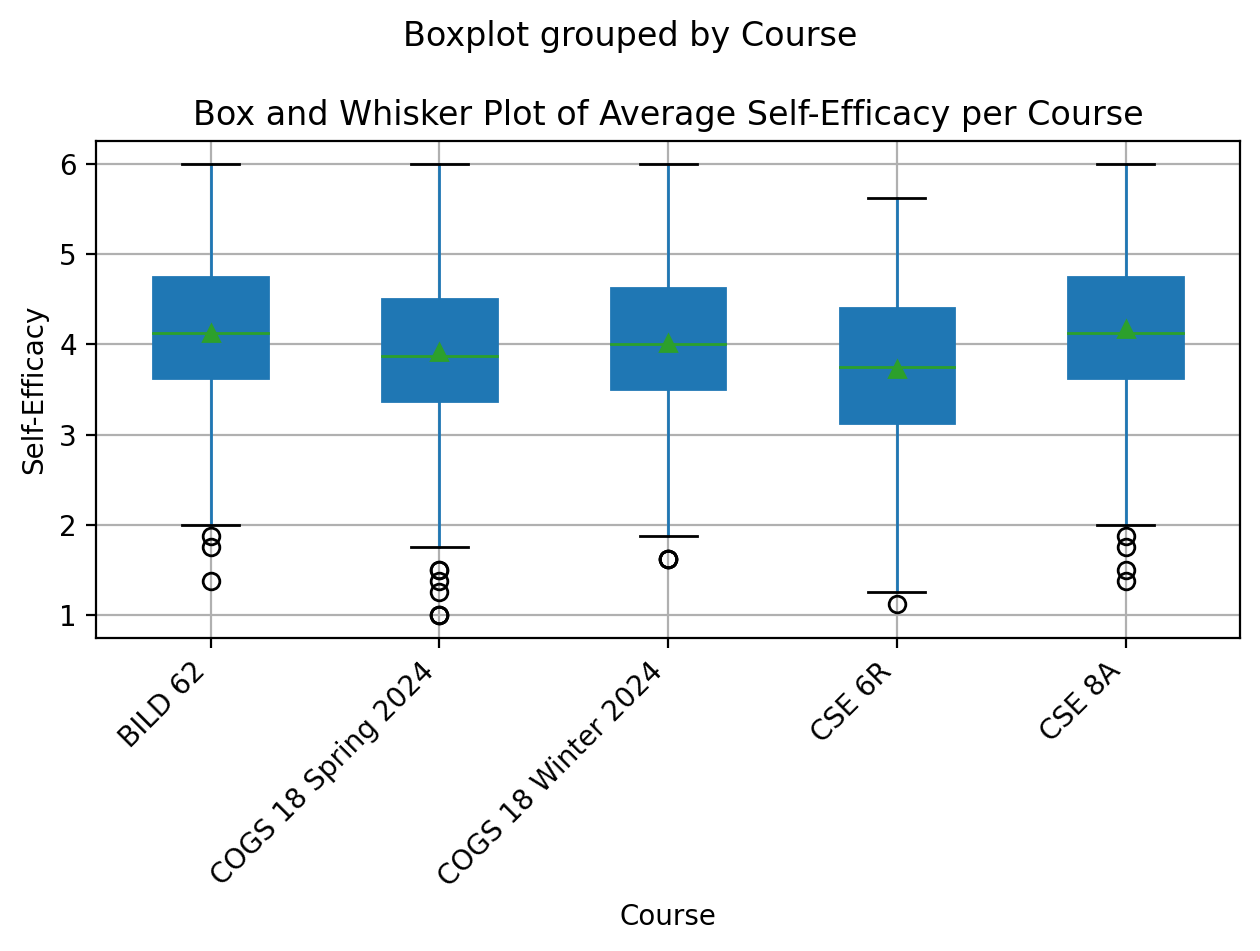

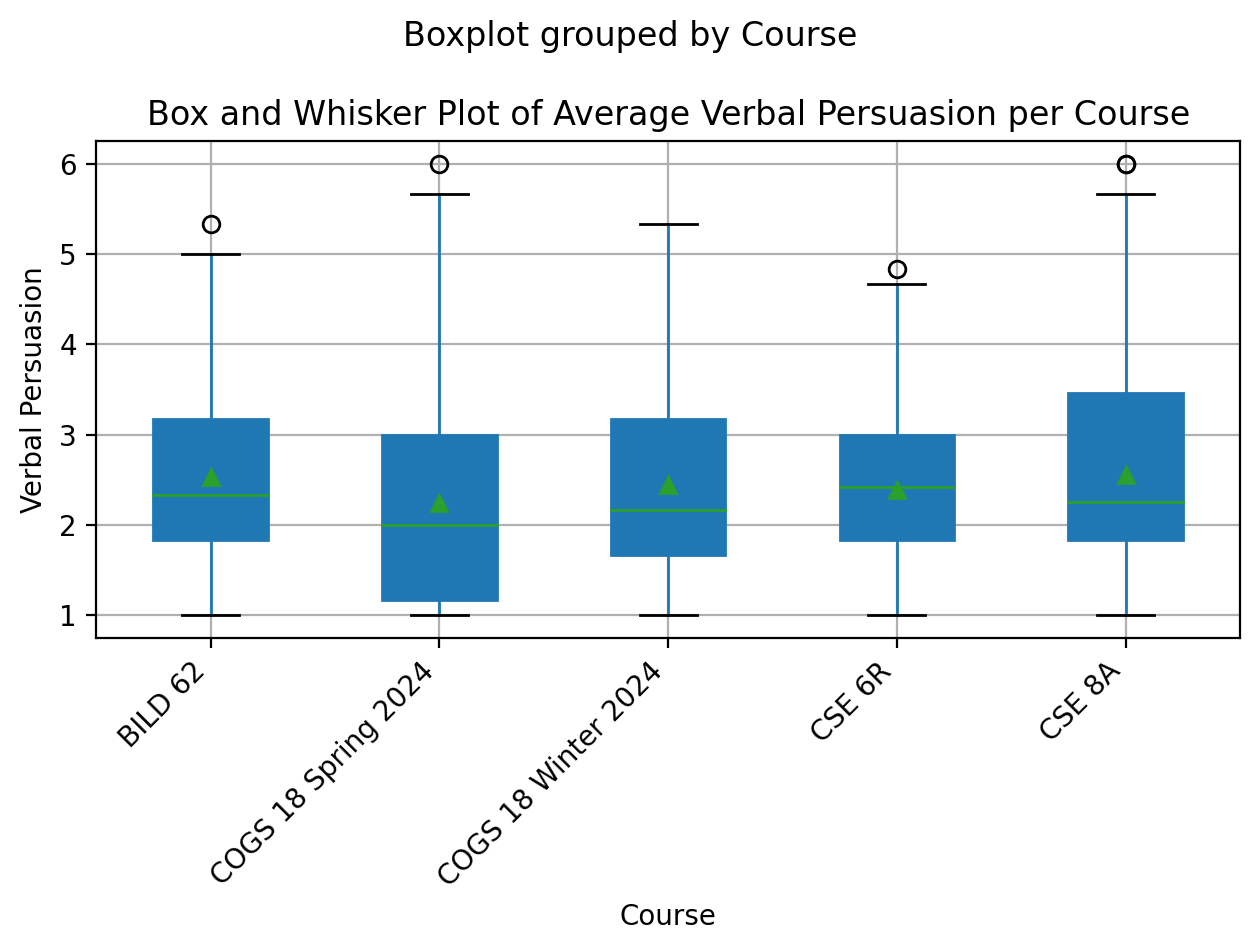

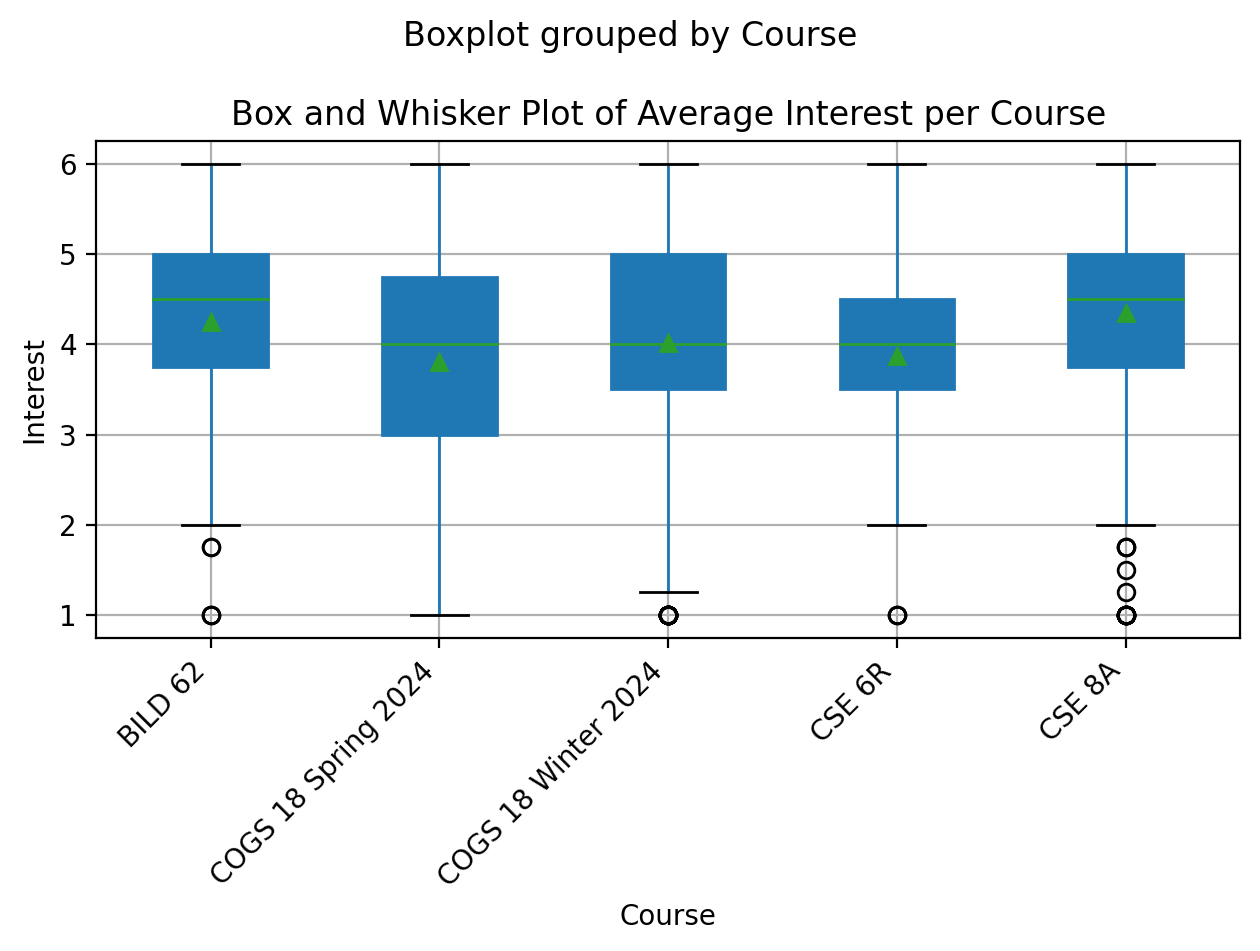

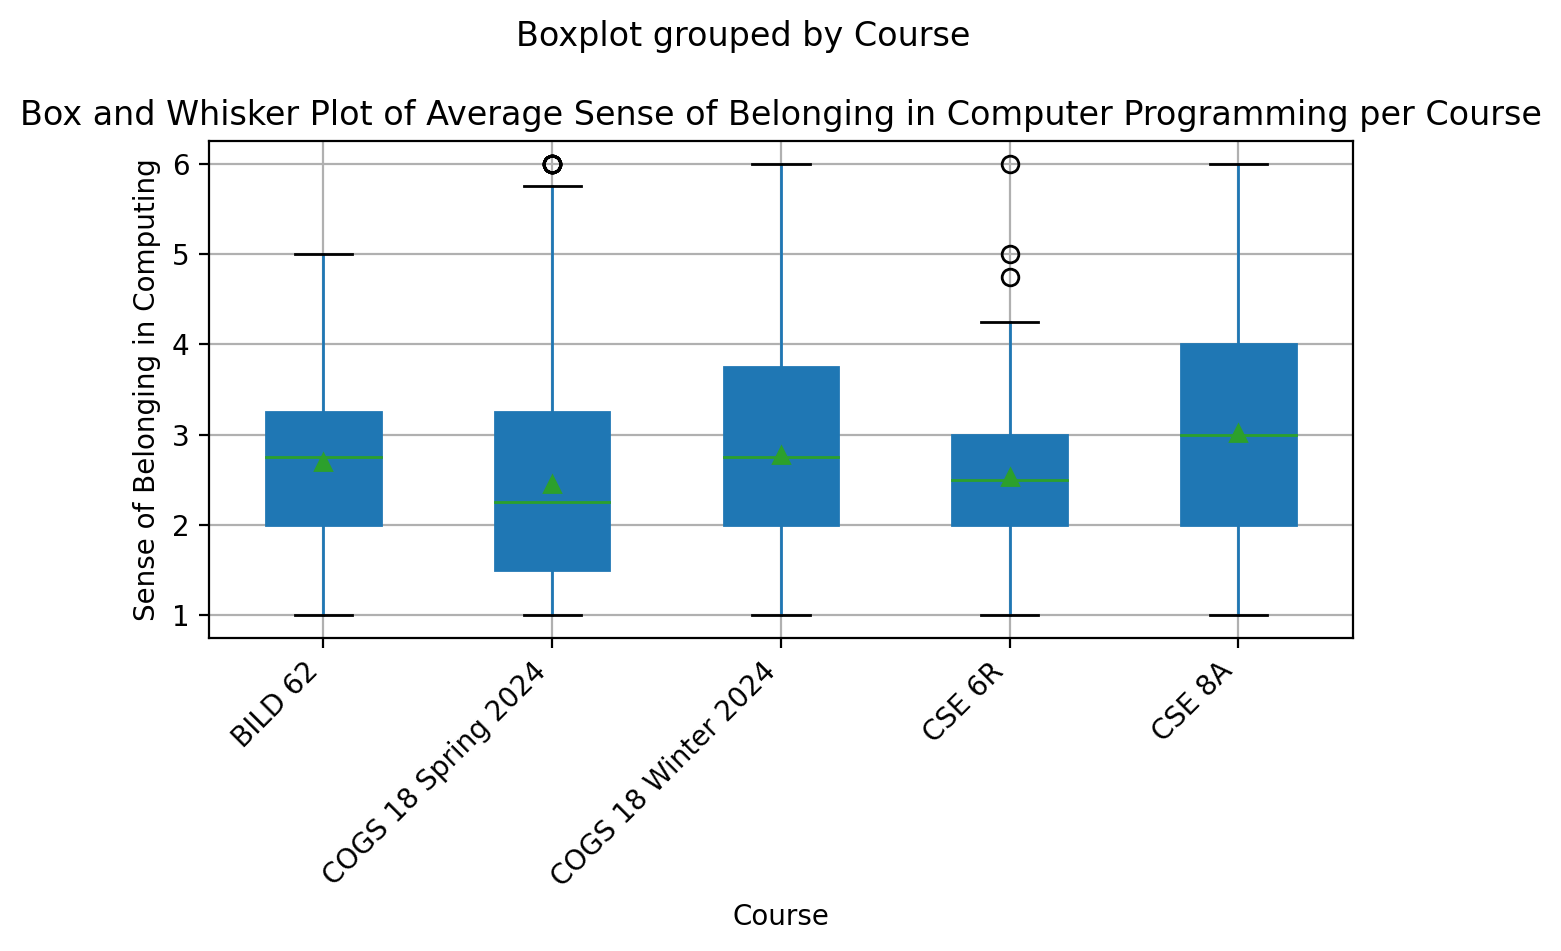

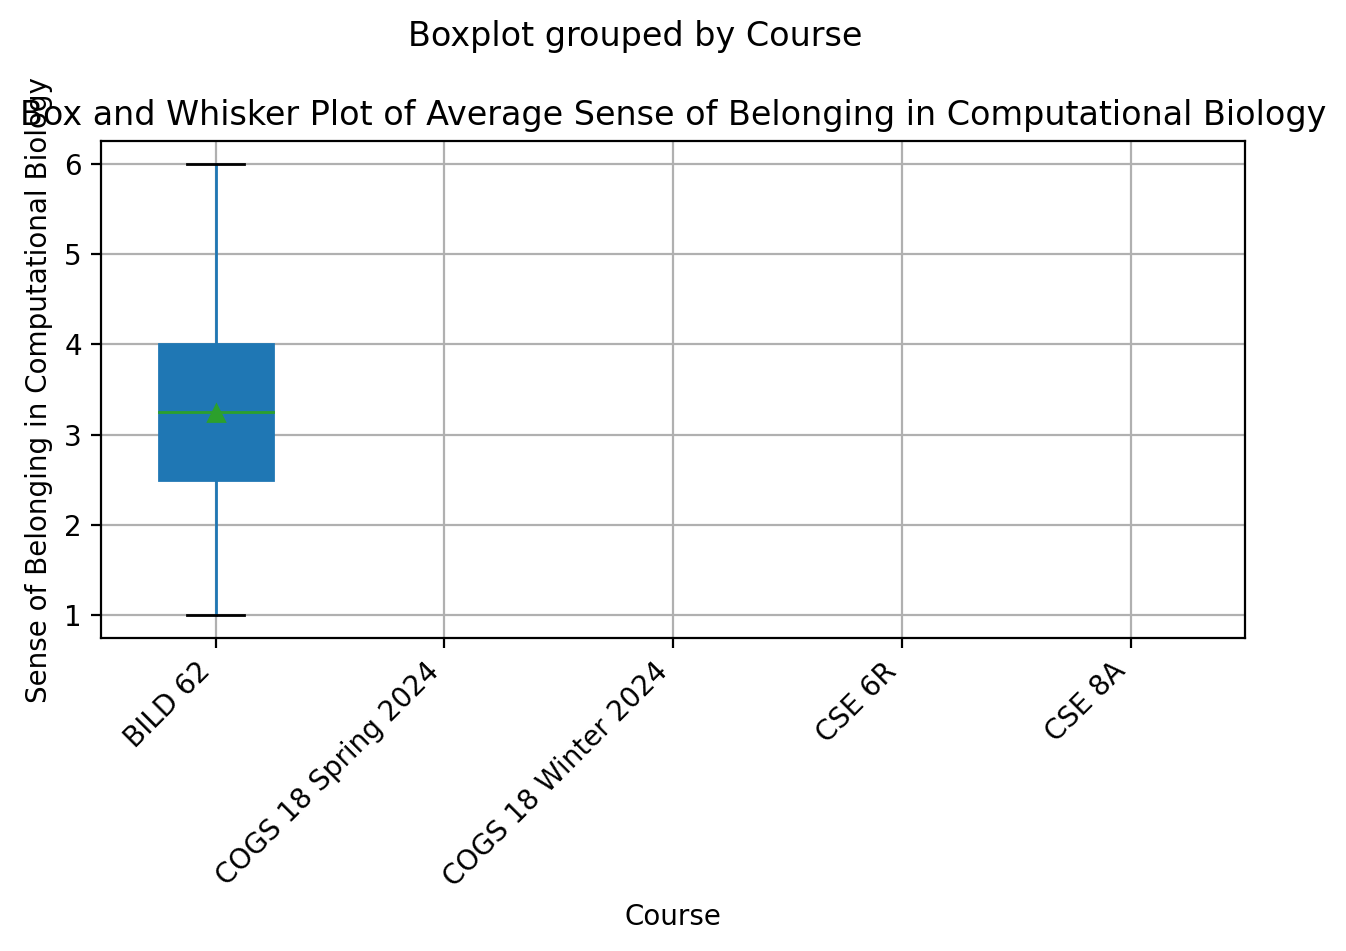

In [ ]:
# Create a box and whisker plots
merged_survey.boxplot(column='Self-Efficacy', by='Course', patch_artist=True, showmeans=True)

# Adding labels and title
plt.xlabel('Course')
plt.ylabel('Self-Efficacy')
plt.title('Box and Whisker Plot of Average Self-Efficacy per Course')

# Show plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

merged_survey.boxplot(column='Verbal_Persuasion', by='Course', patch_artist=True, showmeans=True)

# Adding labels and title
plt.xlabel('Course')
plt.ylabel('Verbal Persuasion')
plt.title('Box and Whisker Plot of Average Verbal Persuasion per Course')

# Show plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

merged_survey.boxplot(column='Interest', by='Course', patch_artist=True, showmeans=True)

# Adding labels and title
plt.xlabel('Course')
plt.ylabel('Interest')
plt.title('Box and Whisker Plot of Average Interest per Course')

# Show plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


merged_survey.boxplot(column='SenseBelonging_Computing', by='Course', patch_artist=True, showmeans=True)

# Adding labels and title
plt.xlabel('Course')
plt.ylabel('Sense of Belonging in Computing')
plt.title('Box and Whisker Plot of Average Sense of Belonging in Computer Programming per Course')

# Show plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

merged_survey.boxplot(column='SenseBelonging_ComputationalBio', by='Course', patch_artist=True, showmeans=True)

# Adding labels and title
plt.xlabel('Course')
plt.ylabel('Sense of Belonging in Computational Biology')
plt.title('Box and Whisker Plot of Average Sense of Belonging in Computational Biology')

# Show plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Item Differences by Gender

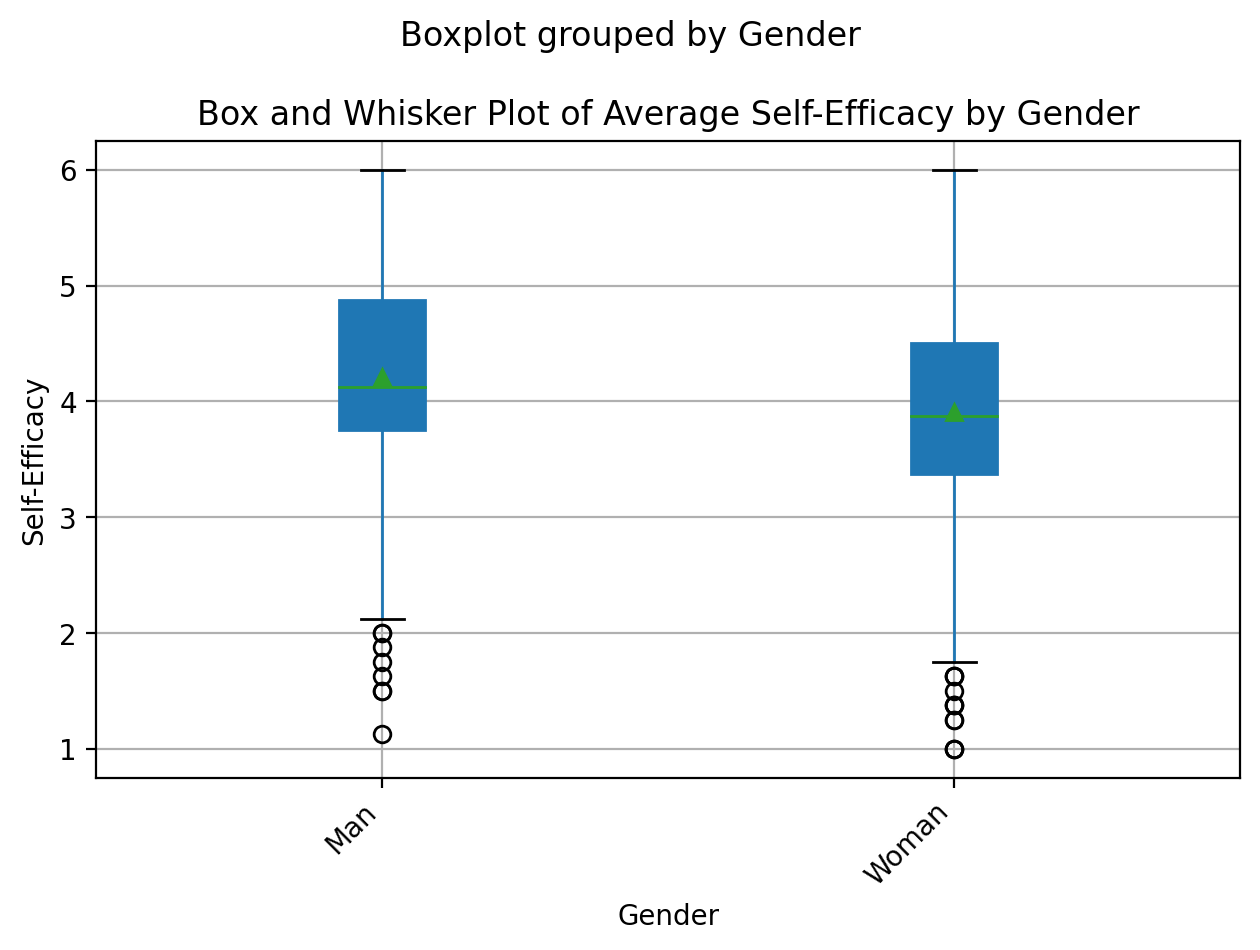

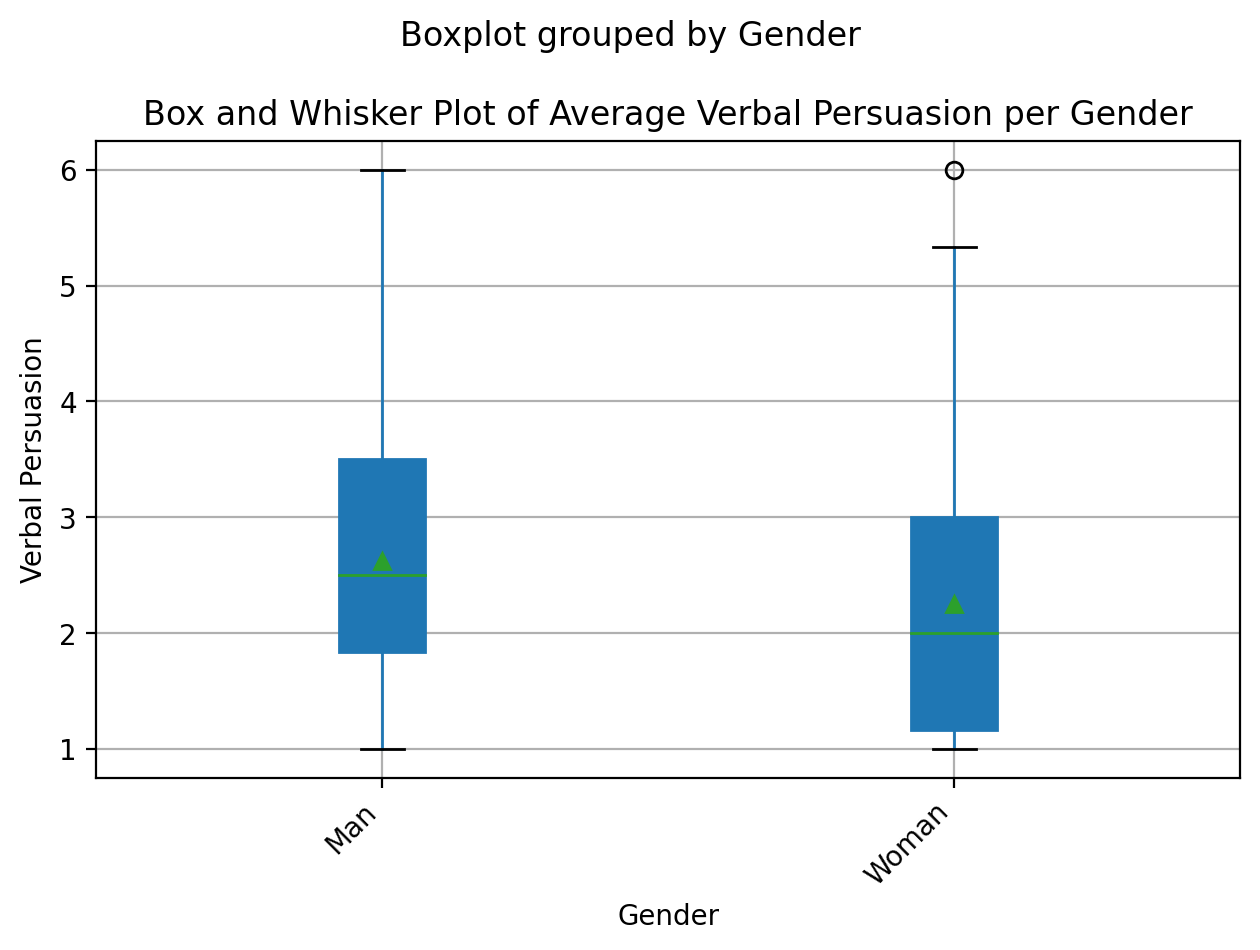

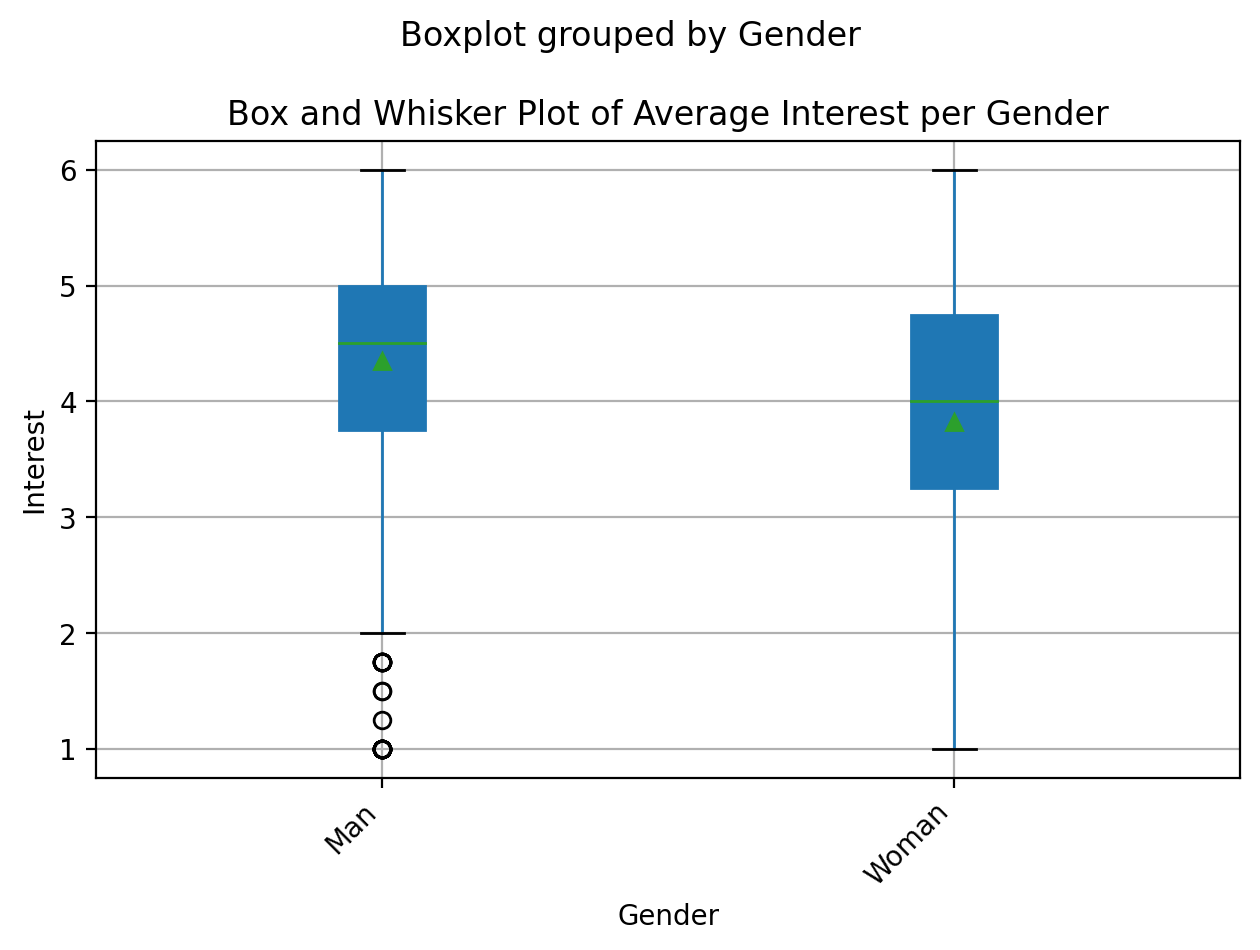

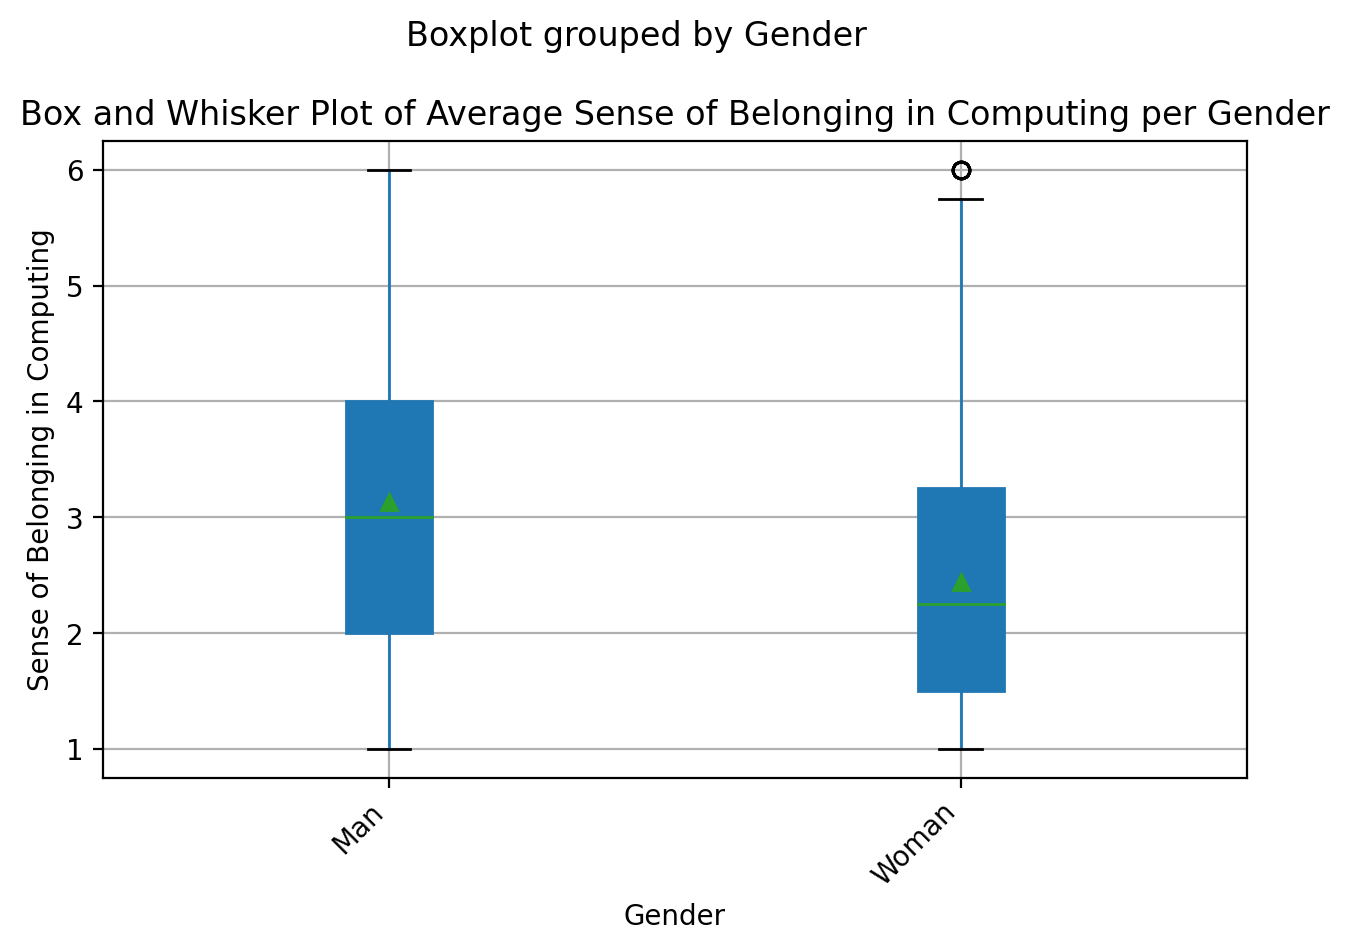

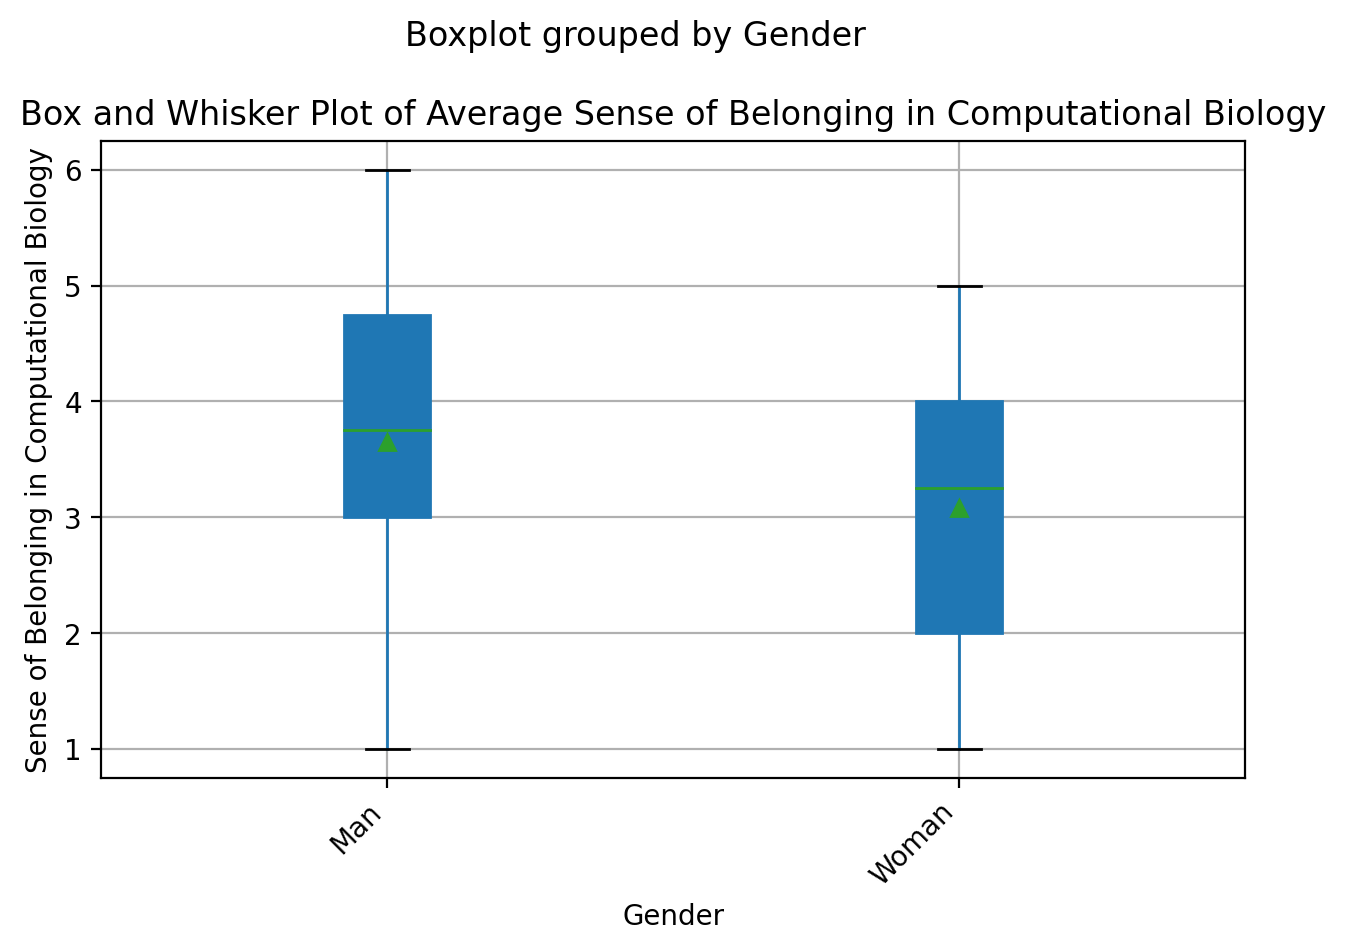

In [ ]:
filtered_gender = merged_survey[merged_survey['Gender'].isin(['Man', 'Woman'])]

# Create a box and whisker plots
filtered_gender.boxplot(column='Self-Efficacy', by='Gender', patch_artist=True, showmeans=True)

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Self-Efficacy')
plt.title('Box and Whisker Plot of Average Self-Efficacy by Gender')

# Show plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

filtered_gender.boxplot(column='Verbal_Persuasion', by='Gender', patch_artist=True, showmeans=True)

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Verbal Persuasion')
plt.title('Box and Whisker Plot of Average Verbal Persuasion per Gender')

# Show plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

filtered_gender.boxplot(column='Interest', by='Gender', patch_artist=True, showmeans=True)

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Interest')
plt.title('Box and Whisker Plot of Average Interest per Gender')

# Show plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


filtered_gender.boxplot(column='SenseBelonging_Computing', by='Gender', patch_artist=True, showmeans=True)

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Sense of Belonging in Computing')
plt.title('Box and Whisker Plot of Average Sense of Belonging in Computing per Gender')

# Show plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

filtered_gender.boxplot(column='SenseBelonging_ComputationalBio', by='Gender', patch_artist=True, showmeans=True)

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Sense of Belonging in Computational Biology')
plt.title('Box and Whisker Plot of Average Sense of Belonging in Computational Biology')

# Show plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




#Export cleaned data file

In [ ]:
merged_survey.to_csv('/content/drive/My Drive/Dissertation Work/Survey Analysis/Attitudinal Survey/Coding Attitudes Survey Spring 2024_Cleaned_Recoded.csv', index=False)